In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

In [4]:
df=pd.read_csv('train.csv')
print(df.shape)
df.head()

(4986, 14)


,id,Date,Count,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day
0,1,05/08/2018,222,6:00,300.3,83,5.04,1080,0.00,0.0,0.0,Summer,NO,YES
1,2,21/01/2018,170,23:00,272.6,32,2.16,2000,0.00,0.0,0.0,Winter,NO,YES
2,3,11/05/2018,486,6:00,285.0,83,1.44,321,0.01,0.0,0.0,Spring,NO,YES
3,4,05/07/2018,929,13:00,301.1,67,3.96,1772,1.43,0.0,0.0,Summer,NO,YES
4,5,02/01/2018,58,5:00,269.9,67,2.16,1384,0.00,0.0,0.0,Winter,NO,YES


### Checking for null values

In [5]:
print(df.isna().sum())

id                 0
Date               0
Count              0
Hour               0
Hotness            0
Humidity           0
Wind Speed         0
Visibility         0
Solar Radiation    0
Rainfall           0
Snowfall           0
Seasons            0
Holiday            0
Working Day        0
dtype: int64


## Info of Data

In [6]:
print(df.dtypes)
print('\n')
for i,col in enumerate(df.columns):
  print( col,len(df[col].unique()))

id                   int64
Date                object
Count                int64
Hour                object
Hotness            float64
Humidity             int64
Wind Speed         float64
Visibility           int64
Solar Radiation    float64
Rainfall           float64
Snowfall           float64
Seasons             object
Holiday             object
Working Day         object
dtype: object


id 4986
Date 365
Count 1813
Hour 24
Hotness 533
Humidity 88
Wind Speed 60
Visibility 1543
Solar Radiation 340
Rainfall 47
Snowfall 45
Seasons 4
Holiday 2
Working Day 2


In [7]:
for col in df.columns:
  if (df[col].dtype == object):
    print(col, " ", df[col].unique(), '\n')

Date   ['05/08/2018' '21/01/2018' '11/05/2018' '05/07/2018' '02/01/2018'
 '09/08/2018' '15/09/2018' '12/06/2018' '20/09/2018' '15/03/2018'
 '11/09/2018' '26/12/2017' '06/09/2018' '26/08/2018' '10/02/2018'
 '26/05/2018' '12/12/2017' '06/06/2018' '27/01/2018' '30/10/2018'
 '09/02/2018' '21/04/2018' '13/10/2018' '25/06/2018' '23/09/2018'
 '01/08/2018' '01/10/2018' '16/07/2018' '27/05/2018' '20/11/2018'
 '10/09/2018' '06/07/2018' '14/06/2018' '14/07/2018' '27/10/2018'
 '21/10/2018' '19/01/2018' '22/10/2018' '15/11/2018' '18/02/2018'
 '12/11/2018' '15/04/2018' '23/12/2017' '14/09/2018' '29/07/2018'
 '27/02/2018' '17/09/2018' '07/06/2018' '19/03/2018' '04/03/2018'
 '07/08/2018' '22/02/2018' '14/01/2018' '28/10/2018' '10/12/2017'
 '18/05/2018' '09/05/2018' '21/08/2018' '15/10/2018' '04/09/2018'
 '23/05/2018' '10/11/2018' '05/11/2018' '03/03/2018' '03/08/2018'
 '07/10/2018' '26/06/2018' '08/04/2018' '25/12/2017' '21/05/2018'
 '28/11/2018' '06/01/2018' '16/10/2018' '21/11/2018' '29/01/2018'
 '1

# Checking relation among data and outliers

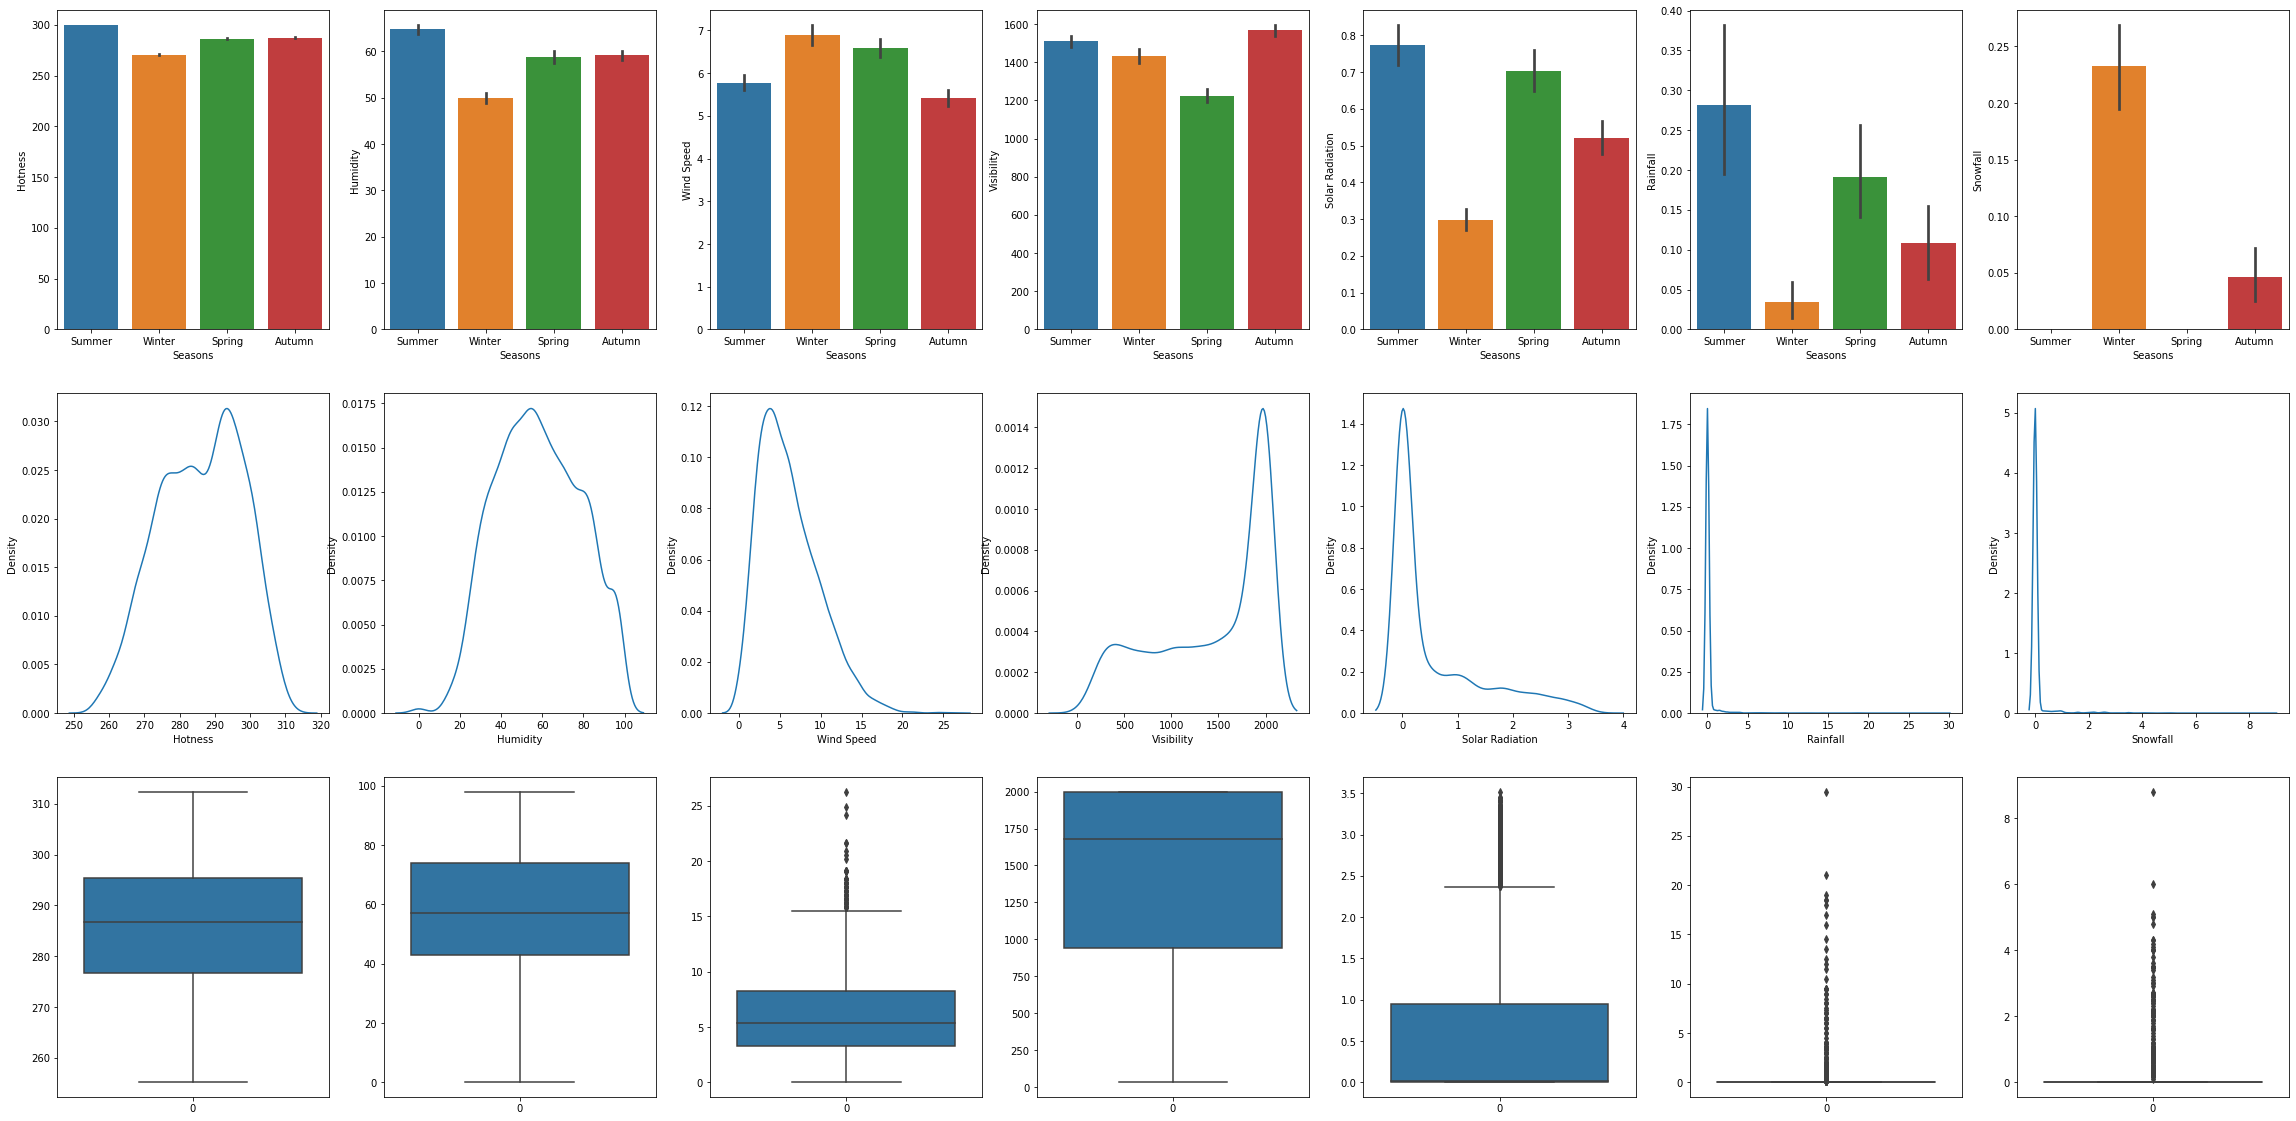

In [8]:
df1=df.iloc[:,4:11]
fig, ax = plt.subplots(3,len(df1.columns), figsize=(40,20))
for i,col in enumerate(df1.columns):
  sns.barplot(ax = ax[0,i],x="Seasons", y=col, data=df)
for i,col in enumerate(df1.columns):
  sns.kdeplot(ax = ax[1,i],data =df1[col]);
for i,col in enumerate(df1.columns):
  sns.boxplot(ax = ax[2,i],data=df1[col])

# Removing Outliers

In [9]:
df = df[df['Wind Speed']<23]             #for wind speed

df = df[df['Rainfall']<20]               #for rainfall

df = df[df['Snowfall']<6]                #for snowfall

df = df[df['Solar Radiation']<3.5]       #for solar radiation

df = df[df['Count']<3500]                #for count

# ENCODING CATEGORICAL FEATURE

In [10]:
df_test=pd.read_csv('test.csv')
df_test.head()

,id,Date,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day
0,4987,10/06/2018,16:00,297.8,51,5.76,2000,1.17,0.0,0.0,Summer,NO,YES
1,4988,21/01/2018,4:00,270.7,47,2.52,984,0.00,0.0,0.0,Winter,NO,YES
2,4989,13/12/2017,2:00,262.6,53,6.48,1949,0.00,0.0,0.0,Winter,NO,YES
3,4990,07/03/2018,0:00,275.8,45,6.12,1493,0.00,0.0,0.0,Spring,NO,YES
4,4991,20/08/2018,22:00,302.0,63,15.12,1776,0.00,0.0,0.0,Summer,NO,YES


<AxesSubplot:xlabel='Hour', ylabel='Count'>

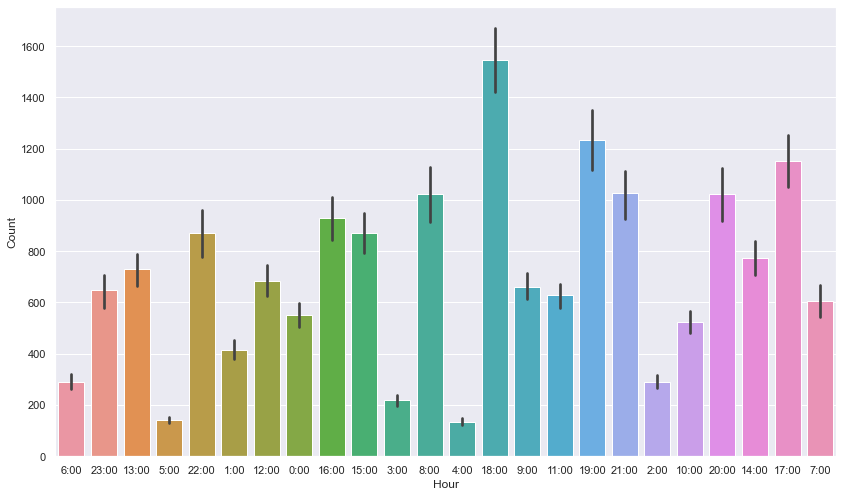

In [11]:
sns.set(rc={'figure.figsize':(14,8.27)})
sns.barplot(x=df['Hour'],y=df['Count'])

# Target Encoding for hour

In [12]:
mean_ordinal=df.groupby(['Hour'])['Count'].mean().to_dict()
mean_ordinal

{'0:00': 551.3045685279188,
 '10:00': 524.2850467289719,
 '11:00': 627.3127962085308,
 '12:00': 684.6410256410256,
 '13:00': 728.9065420560747,
 '14:00': 773.7906976744187,
 '15:00': 872.955,
 '16:00': 929.4380952380952,
 '17:00': 1151.3826530612246,
 '18:00': 1546.1363636363637,
 '19:00': 1233.4634146341464,
 '1:00': 414.8536585365854,
 '20:00': 1021.321608040201,
 '21:00': 1025.184331797235,
 '22:00': 869.4010152284264,
 '23:00': 647.2857142857143,
 '2:00': 289.81516587677726,
 '3:00': 217.70616113744074,
 '4:00': 134.88018433179724,
 '5:00': 142.1144278606965,
 '6:00': 289.7598039215686,
 '7:00': 604.362831858407,
 '8:00': 1023.2474747474747,
 '9:00': 662.3744075829384}

In [13]:
df['Hour']=df['Hour'].map(mean_ordinal)
df_test['Hour']=df_test['Hour'].map(mean_ordinal)


# Target Encoding for holiday

In [14]:
mean_ordinal1=df.groupby(['Holiday'])['Count'].mean().to_dict()
mean_ordinal1

{'NO': 717.9993637327677, 'YES': 490.51908396946567}

In [15]:
df['Holiday']=df['Holiday'].map(mean_ordinal1)
df_test['Holiday']=df_test['Holiday'].map(mean_ordinal1)

# One Hot Encoding for Working Day





In [16]:
mean_ordinal2=df.groupby(['Working Day'])['Count'].mean().to_dict()
mean_ordinal2

{'NO': 0.0, 'YES': 729.4753996263235}

In [17]:
mean_ordinal2['YES']=1
mean_ordinal2['NO']=0

In [18]:
df['Working Day']=df['Working Day'].map(mean_ordinal2)
df_test['Working Day']=df_test['Working Day'].map(mean_ordinal2)

# Target Encoding for Season

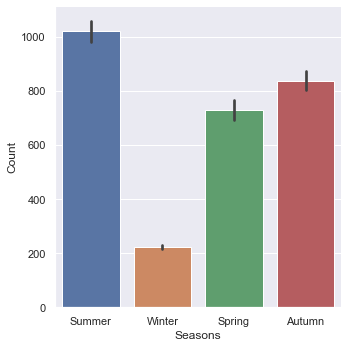

In [19]:
sns.catplot(x="Seasons", y="Count", kind="bar", data=df)

In [20]:
mean_ordinal_s=df.groupby(['Seasons'])['Count'].mean().to_dict()
mean_ordinal_s

{'Autumn': 836.910530482977,
 'Spring': 728.4497272018706,
 'Summer': 1019.8497156783103,
 'Winter': 222.3575}

In [21]:
df['Seasons']=df['Seasons'].map(mean_ordinal_s)
df_test['Seasons']=df_test['Seasons'].map(mean_ordinal_s)

In [22]:
df.head()

,id,Date,Count,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day
0,1,05/08/2018,222,289.759804,300.3,83,5.04,1080,0.00,0.0,0.0,1019.849716,717.999364,1
1,2,21/01/2018,170,647.285714,272.6,32,2.16,2000,0.00,0.0,0.0,222.357500,717.999364,1
2,3,11/05/2018,486,289.759804,285.0,83,1.44,321,0.01,0.0,0.0,728.449727,717.999364,1
3,4,05/07/2018,929,728.906542,301.1,67,3.96,1772,1.43,0.0,0.0,1019.849716,717.999364,1
4,5,02/01/2018,58,142.114428,269.9,67,2.16,1384,0.00,0.0,0.0,222.357500,717.999364,1


In [23]:
df_test.head()

,id,Date,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day
0,4987,10/06/2018,929.438095,297.8,51,5.76,2000,1.17,0.0,0.0,1019.849716,717.999364,1
1,4988,21/01/2018,134.880184,270.7,47,2.52,984,0.00,0.0,0.0,222.357500,717.999364,1
2,4989,13/12/2017,289.815166,262.6,53,6.48,1949,0.00,0.0,0.0,222.357500,717.999364,1
3,4990,07/03/2018,551.304569,275.8,45,6.12,1493,0.00,0.0,0.0,728.449727,717.999364,1
4,4991,20/08/2018,869.401015,302.0,63,15.12,1776,0.00,0.0,0.0,1019.849716,717.999364,1


## Training and Testing

In [33]:
df1=df
df_test1=df_test.drop(['id','Date'],axis = 1)

In [34]:
x_train = df1.drop(['Count','id','Date'],axis = 1)
y_train = df1['Count']
x_test = df_test1
x=np.array(x_train)
y=np.array(y_train)

In [35]:
x_test.columns == x_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [30]:
!pip install CatBoost

In [31]:
from catboost import CatBoostRegressor

In [36]:
model = CatBoostRegressor()
grid = {'learning_rate': [0.01,0.03,0.05,0.07, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}
randomized_search_result = model.randomized_search(grid,
                                                   X=x,
                                                   y=y,
                                                   plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 902.1214459	test: 914.6714400	best: 914.6714400 (0)	total: 151ms	remaining: 2m 30s
1:	learn: 855.4917216	test: 866.9372544	best: 866.9372544 (1)	total: 152ms	remaining: 1m 15s
2:	learn: 813.7912214	test: 823.5858996	best: 823.5858996 (2)	total: 153ms	remaining: 50.7s
3:	learn: 772.3059856	test: 780.9050147	best: 780.9050147 (3)	total: 153ms	remaining: 38.2s
4:	learn: 737.2546236	test: 744.9827798	best: 744.9827798 (4)	total: 154ms	remaining: 30.7s
5:	learn: 701.6237941	test: 707.4373225	best: 707.4373225 (5)	total: 156ms	remaining: 25.8s
6:	learn: 668.5818389	test: 673.6955153	best: 673.6955153 (6)	total: 157ms	remaining: 22.2s
7:	learn: 637.8824421	test: 642.3152189	best: 642.3152189 (7)	total: 158ms	remaining: 19.5s
8:	learn: 608.8770441	test: 613.2696761	best: 613.2696761 (8)	total: 159ms	remaining: 17.5s
9:	learn: 582.3240900	test: 587.1276905	best: 587.1276905 (9)	total: 160ms	remaining: 15.8s
10:	learn: 557.3093847	test: 561.4912078	best: 561.4912078 (10)	total: 160ms	r

182:	learn: 238.8985556	test: 262.2795403	best: 262.2795403 (182)	total: 322ms	remaining: 1.44s
183:	learn: 238.7124240	test: 262.2462245	best: 262.2462245 (183)	total: 323ms	remaining: 1.43s
184:	learn: 238.5082553	test: 262.2185406	best: 262.2185406 (184)	total: 324ms	remaining: 1.43s
185:	learn: 238.4043791	test: 262.2260477	best: 262.2185406 (184)	total: 325ms	remaining: 1.42s
186:	learn: 238.1061644	test: 262.1418415	best: 262.1418415 (186)	total: 326ms	remaining: 1.42s
187:	learn: 237.9536161	test: 262.0426799	best: 262.0426799 (187)	total: 326ms	remaining: 1.41s
188:	learn: 237.8622716	test: 262.0274553	best: 262.0274553 (188)	total: 327ms	remaining: 1.4s
189:	learn: 237.7099820	test: 261.9821643	best: 261.9821643 (189)	total: 328ms	remaining: 1.4s
190:	learn: 237.3625939	test: 262.0649474	best: 261.9821643 (189)	total: 329ms	remaining: 1.39s
191:	learn: 237.0520671	test: 261.7944347	best: 261.7944347 (191)	total: 330ms	remaining: 1.39s
192:	learn: 236.8050947	test: 261.5997764	

361:	learn: 214.9162449	test: 257.1642380	best: 256.7803879 (344)	total: 494ms	remaining: 871ms
362:	learn: 214.7643040	test: 257.1403233	best: 256.7803879 (344)	total: 495ms	remaining: 869ms
363:	learn: 214.6834884	test: 257.0829996	best: 256.7803879 (344)	total: 496ms	remaining: 867ms
364:	learn: 214.5154142	test: 257.2178183	best: 256.7803879 (344)	total: 497ms	remaining: 865ms
365:	learn: 214.4752555	test: 257.2767712	best: 256.7803879 (344)	total: 498ms	remaining: 863ms
366:	learn: 214.3345698	test: 257.1895452	best: 256.7803879 (344)	total: 499ms	remaining: 861ms
367:	learn: 214.1602397	test: 257.1759872	best: 256.7803879 (344)	total: 500ms	remaining: 859ms
368:	learn: 213.9065621	test: 257.1176189	best: 256.7803879 (344)	total: 501ms	remaining: 856ms
369:	learn: 213.8176419	test: 257.1703610	best: 256.7803879 (344)	total: 502ms	remaining: 854ms
370:	learn: 213.7567218	test: 257.1783860	best: 256.7803879 (344)	total: 503ms	remaining: 852ms
371:	learn: 213.7089377	test: 257.093179

550:	learn: 198.2592907	test: 256.8301411	best: 256.1359780 (424)	total: 666ms	remaining: 543ms
551:	learn: 198.1993741	test: 256.8211736	best: 256.1359780 (424)	total: 667ms	remaining: 541ms
552:	learn: 198.0350656	test: 257.0562858	best: 256.1359780 (424)	total: 668ms	remaining: 540ms
553:	learn: 197.9833385	test: 257.0268258	best: 256.1359780 (424)	total: 669ms	remaining: 539ms
554:	learn: 197.8251891	test: 257.2147386	best: 256.1359780 (424)	total: 670ms	remaining: 537ms
555:	learn: 197.7563933	test: 257.1987299	best: 256.1359780 (424)	total: 671ms	remaining: 536ms
556:	learn: 197.6842924	test: 257.1339747	best: 256.1359780 (424)	total: 672ms	remaining: 535ms
557:	learn: 197.6309547	test: 257.1189694	best: 256.1359780 (424)	total: 673ms	remaining: 533ms
558:	learn: 197.5899538	test: 257.1049273	best: 256.1359780 (424)	total: 674ms	remaining: 532ms
559:	learn: 197.5294102	test: 257.0623575	best: 256.1359780 (424)	total: 675ms	remaining: 530ms
560:	learn: 197.4906721	test: 257.024739

727:	learn: 186.2174845	test: 257.6534945	best: 256.1359780 (424)	total: 837ms	remaining: 313ms
728:	learn: 186.1198878	test: 257.5715308	best: 256.1359780 (424)	total: 838ms	remaining: 312ms
729:	learn: 186.0544866	test: 257.5464872	best: 256.1359780 (424)	total: 839ms	remaining: 310ms
730:	learn: 185.9843316	test: 257.4979186	best: 256.1359780 (424)	total: 840ms	remaining: 309ms
731:	learn: 185.8648967	test: 257.4729420	best: 256.1359780 (424)	total: 841ms	remaining: 308ms
732:	learn: 185.8439179	test: 257.4254164	best: 256.1359780 (424)	total: 842ms	remaining: 307ms
733:	learn: 185.7722157	test: 257.3468709	best: 256.1359780 (424)	total: 843ms	remaining: 306ms
734:	learn: 185.7293960	test: 257.3533915	best: 256.1359780 (424)	total: 844ms	remaining: 304ms
735:	learn: 185.6998790	test: 257.3494303	best: 256.1359780 (424)	total: 845ms	remaining: 303ms
736:	learn: 185.5693155	test: 257.3890890	best: 256.1359780 (424)	total: 846ms	remaining: 302ms
737:	learn: 185.4850672	test: 257.382441

894:	learn: 176.6270576	test: 256.7169177	best: 256.1359780 (424)	total: 1.01s	remaining: 118ms
895:	learn: 176.5713130	test: 256.7175789	best: 256.1359780 (424)	total: 1.01s	remaining: 117ms
896:	learn: 176.5038810	test: 256.7125076	best: 256.1359780 (424)	total: 1.01s	remaining: 116ms
897:	learn: 176.4675324	test: 256.6975573	best: 256.1359780 (424)	total: 1.01s	remaining: 115ms
898:	learn: 176.4115305	test: 256.6403679	best: 256.1359780 (424)	total: 1.01s	remaining: 114ms
899:	learn: 176.3846920	test: 256.6224229	best: 256.1359780 (424)	total: 1.01s	remaining: 113ms
900:	learn: 176.3048907	test: 256.6525734	best: 256.1359780 (424)	total: 1.02s	remaining: 112ms
901:	learn: 176.2739391	test: 256.6745362	best: 256.1359780 (424)	total: 1.02s	remaining: 111ms
902:	learn: 176.2545312	test: 256.6600109	best: 256.1359780 (424)	total: 1.02s	remaining: 109ms
903:	learn: 176.1364048	test: 256.7678230	best: 256.1359780 (424)	total: 1.02s	remaining: 108ms
904:	learn: 176.1069026	test: 256.808265

57:	learn: 276.8384321	test: 287.7625042	best: 287.7625042 (57)	total: 62ms	remaining: 1.01s
58:	learn: 276.0527284	test: 287.2159403	best: 287.2159403 (58)	total: 63ms	remaining: 1s
59:	learn: 275.0638609	test: 286.3350009	best: 286.3350009 (59)	total: 63.9ms	remaining: 1s
60:	learn: 274.2913618	test: 285.5240537	best: 285.5240537 (60)	total: 64.7ms	remaining: 995ms
61:	learn: 273.4505612	test: 285.1960351	best: 285.1960351 (61)	total: 65.5ms	remaining: 992ms
62:	learn: 272.7922622	test: 284.4099871	best: 284.4099871 (62)	total: 66.4ms	remaining: 988ms
63:	learn: 272.1940826	test: 283.8969768	best: 283.8969768 (63)	total: 67.4ms	remaining: 985ms
64:	learn: 271.4892001	test: 283.1698915	best: 283.1698915 (64)	total: 68.3ms	remaining: 983ms
65:	learn: 270.8966503	test: 282.6571144	best: 282.6571144 (65)	total: 69.3ms	remaining: 981ms
66:	learn: 270.1605233	test: 281.9749825	best: 281.9749825 (66)	total: 70.3ms	remaining: 978ms
67:	learn: 269.5919526	test: 281.6559776	best: 281.6559776 (

218:	learn: 235.8988855	test: 261.7448224	best: 261.7448224 (218)	total: 234ms	remaining: 836ms
219:	learn: 235.7550194	test: 261.4853948	best: 261.4853948 (219)	total: 236ms	remaining: 836ms
220:	learn: 235.6282428	test: 261.3028979	best: 261.3028979 (220)	total: 237ms	remaining: 834ms
221:	learn: 235.5410066	test: 261.2799651	best: 261.2799651 (221)	total: 238ms	remaining: 834ms
222:	learn: 235.4902042	test: 261.2944022	best: 261.2799651 (221)	total: 239ms	remaining: 832ms
223:	learn: 235.4341936	test: 261.2478915	best: 261.2478915 (223)	total: 240ms	remaining: 831ms
224:	learn: 235.4270471	test: 261.2459410	best: 261.2459410 (224)	total: 241ms	remaining: 829ms
225:	learn: 235.4202199	test: 261.2439567	best: 261.2439567 (225)	total: 242ms	remaining: 828ms
226:	learn: 235.3891997	test: 261.2375243	best: 261.2375243 (226)	total: 243ms	remaining: 827ms
227:	learn: 235.2145136	test: 261.1674226	best: 261.1674226 (227)	total: 244ms	remaining: 826ms
228:	learn: 235.1876586	test: 261.195247

391:	learn: 218.3616780	test: 256.9397545	best: 256.8490873 (390)	total: 407ms	remaining: 631ms
392:	learn: 218.2840588	test: 256.8864932	best: 256.8490873 (390)	total: 408ms	remaining: 630ms
393:	learn: 218.2490644	test: 256.8809325	best: 256.8490873 (390)	total: 409ms	remaining: 629ms
394:	learn: 218.1639010	test: 256.8554128	best: 256.8490873 (390)	total: 410ms	remaining: 628ms
395:	learn: 218.0892413	test: 256.8530179	best: 256.8490873 (390)	total: 411ms	remaining: 627ms
396:	learn: 217.9533979	test: 256.9714094	best: 256.8490873 (390)	total: 412ms	remaining: 626ms
397:	learn: 217.9082277	test: 256.9876404	best: 256.8490873 (390)	total: 413ms	remaining: 624ms
398:	learn: 217.8127204	test: 256.9054558	best: 256.8490873 (390)	total: 414ms	remaining: 623ms
399:	learn: 217.6362329	test: 256.8392526	best: 256.8392526 (399)	total: 415ms	remaining: 622ms
400:	learn: 217.5809677	test: 256.7444173	best: 256.7444173 (400)	total: 416ms	remaining: 621ms
401:	learn: 217.4821021	test: 256.641715

559:	learn: 205.1028740	test: 254.8499273	best: 254.7017239 (553)	total: 579ms	remaining: 455ms
560:	learn: 205.0649999	test: 254.7485025	best: 254.7017239 (553)	total: 580ms	remaining: 453ms
561:	learn: 205.0015512	test: 254.6608348	best: 254.6608348 (561)	total: 581ms	remaining: 452ms
562:	learn: 204.9607195	test: 254.6340988	best: 254.6340988 (562)	total: 582ms	remaining: 451ms
563:	learn: 204.9064669	test: 254.6879642	best: 254.6340988 (562)	total: 582ms	remaining: 450ms
564:	learn: 204.8608600	test: 254.6870184	best: 254.6340988 (562)	total: 583ms	remaining: 449ms
565:	learn: 204.7424566	test: 254.7267697	best: 254.6340988 (562)	total: 584ms	remaining: 448ms
566:	learn: 204.6406328	test: 254.6400770	best: 254.6340988 (562)	total: 585ms	remaining: 447ms
567:	learn: 204.5434764	test: 254.6377574	best: 254.6340988 (562)	total: 586ms	remaining: 446ms
568:	learn: 204.4252970	test: 254.6223125	best: 254.6223125 (568)	total: 587ms	remaining: 445ms
569:	learn: 204.4037210	test: 254.606696

741:	learn: 193.4628021	test: 253.6048699	best: 253.5211747 (738)	total: 750ms	remaining: 261ms
742:	learn: 193.3802071	test: 253.5223922	best: 253.5211747 (738)	total: 751ms	remaining: 260ms
743:	learn: 193.3278268	test: 253.5261165	best: 253.5211747 (738)	total: 752ms	remaining: 259ms
744:	learn: 193.2596898	test: 253.5086357	best: 253.5086357 (744)	total: 753ms	remaining: 258ms
745:	learn: 193.2109993	test: 253.5446788	best: 253.5086357 (744)	total: 754ms	remaining: 257ms
746:	learn: 193.1873354	test: 253.5531161	best: 253.5086357 (744)	total: 755ms	remaining: 256ms
747:	learn: 193.1512373	test: 253.5355694	best: 253.5086357 (744)	total: 756ms	remaining: 255ms
748:	learn: 193.1179305	test: 253.5216688	best: 253.5086357 (744)	total: 757ms	remaining: 254ms
749:	learn: 193.0405520	test: 253.5397140	best: 253.5086357 (744)	total: 758ms	remaining: 253ms
750:	learn: 192.9568295	test: 253.6703401	best: 253.5086357 (744)	total: 759ms	remaining: 252ms
751:	learn: 192.9166424	test: 253.692093

893:	learn: 185.7373229	test: 253.3649540	best: 253.0410947 (806)	total: 927ms	remaining: 110ms
894:	learn: 185.6859315	test: 253.3702295	best: 253.0410947 (806)	total: 929ms	remaining: 109ms
895:	learn: 185.5910574	test: 253.3780558	best: 253.0410947 (806)	total: 930ms	remaining: 108ms
896:	learn: 185.5273731	test: 253.3971844	best: 253.0410947 (806)	total: 931ms	remaining: 107ms
897:	learn: 185.4465334	test: 253.4125810	best: 253.0410947 (806)	total: 932ms	remaining: 106ms
898:	learn: 185.4152888	test: 253.4028138	best: 253.0410947 (806)	total: 933ms	remaining: 105ms
899:	learn: 185.3634815	test: 253.3472454	best: 253.0410947 (806)	total: 934ms	remaining: 104ms
900:	learn: 185.2729786	test: 253.3312603	best: 253.0410947 (806)	total: 935ms	remaining: 103ms
901:	learn: 185.2239477	test: 253.3573926	best: 253.0410947 (806)	total: 936ms	remaining: 102ms
902:	learn: 185.1667137	test: 253.4341688	best: 253.0410947 (806)	total: 937ms	remaining: 101ms
903:	learn: 185.1366092	test: 253.451951

66:	learn: 347.4011931	test: 350.7485820	best: 350.7485820 (66)	total: 61.2ms	remaining: 852ms
67:	learn: 344.9849836	test: 348.4887857	best: 348.4887857 (67)	total: 62.1ms	remaining: 851ms
68:	learn: 342.5009200	test: 346.1620253	best: 346.1620253 (68)	total: 63ms	remaining: 850ms
69:	learn: 340.2732471	test: 343.8171730	best: 343.8171730 (69)	total: 64ms	remaining: 850ms
70:	learn: 338.2948374	test: 341.9020072	best: 341.9020072 (70)	total: 64.8ms	remaining: 847ms
71:	learn: 336.2646584	test: 340.0753763	best: 340.0753763 (71)	total: 65.7ms	remaining: 847ms
72:	learn: 334.3758683	test: 338.2018071	best: 338.2018071 (72)	total: 66.7ms	remaining: 846ms
73:	learn: 332.4409051	test: 336.4351364	best: 336.4351364 (73)	total: 67.6ms	remaining: 846ms
74:	learn: 330.9567456	test: 335.0900235	best: 335.0900235 (74)	total: 68.5ms	remaining: 845ms
75:	learn: 329.2915941	test: 333.4247655	best: 333.4247655 (75)	total: 69.5ms	remaining: 845ms
76:	learn: 327.6206918	test: 331.7218661	best: 331.721

239:	learn: 256.8448196	test: 272.8672529	best: 272.8672529 (239)	total: 233ms	remaining: 738ms
240:	learn: 256.6154591	test: 272.7627337	best: 272.7627337 (240)	total: 234ms	remaining: 738ms
241:	learn: 256.5293407	test: 272.8089759	best: 272.7627337 (240)	total: 235ms	remaining: 737ms
242:	learn: 256.4415078	test: 272.7792566	best: 272.7627337 (240)	total: 236ms	remaining: 736ms
243:	learn: 256.3530232	test: 272.6970838	best: 272.6970838 (243)	total: 237ms	remaining: 735ms
244:	learn: 256.2166982	test: 272.5134562	best: 272.5134562 (244)	total: 238ms	remaining: 733ms
245:	learn: 256.1154630	test: 272.4048628	best: 272.4048628 (245)	total: 239ms	remaining: 732ms
246:	learn: 255.9606630	test: 272.3928401	best: 272.3928401 (246)	total: 240ms	remaining: 731ms
247:	learn: 255.8613702	test: 272.3675071	best: 272.3675071 (247)	total: 241ms	remaining: 730ms
248:	learn: 255.6044886	test: 272.1307810	best: 272.1307810 (248)	total: 242ms	remaining: 729ms
249:	learn: 255.5115482	test: 272.039542

419:	learn: 242.3483706	test: 264.0855595	best: 264.0838560 (417)	total: 406ms	remaining: 560ms
420:	learn: 242.3307256	test: 264.1007341	best: 264.0838560 (417)	total: 407ms	remaining: 559ms
421:	learn: 242.2512129	test: 264.0642100	best: 264.0642100 (421)	total: 408ms	remaining: 558ms
422:	learn: 242.1423903	test: 264.1086236	best: 264.0642100 (421)	total: 409ms	remaining: 557ms
423:	learn: 242.0591902	test: 264.0829059	best: 264.0642100 (421)	total: 409ms	remaining: 556ms
424:	learn: 242.0540312	test: 264.0827889	best: 264.0642100 (421)	total: 410ms	remaining: 555ms
425:	learn: 241.9760778	test: 264.1105509	best: 264.0642100 (421)	total: 411ms	remaining: 554ms
426:	learn: 241.9709803	test: 264.1114758	best: 264.0642100 (421)	total: 412ms	remaining: 553ms
427:	learn: 241.9542368	test: 264.1278372	best: 264.0642100 (421)	total: 413ms	remaining: 552ms
428:	learn: 241.9493024	test: 264.1272372	best: 264.0642100 (421)	total: 414ms	remaining: 551ms
429:	learn: 241.9326085	test: 264.124881

585:	learn: 233.8482565	test: 260.2753551	best: 260.2753551 (585)	total: 578ms	remaining: 408ms
586:	learn: 233.7911594	test: 260.2646853	best: 260.2646853 (586)	total: 579ms	remaining: 407ms
587:	learn: 233.6912280	test: 260.2069807	best: 260.2069807 (587)	total: 580ms	remaining: 406ms
588:	learn: 233.6219405	test: 260.1483080	best: 260.1483080 (588)	total: 581ms	remaining: 405ms
589:	learn: 233.5723850	test: 260.1314333	best: 260.1314333 (589)	total: 581ms	remaining: 404ms
590:	learn: 233.5135275	test: 260.0729222	best: 260.0729222 (590)	total: 582ms	remaining: 403ms
591:	learn: 233.4720333	test: 260.0828696	best: 260.0729222 (590)	total: 583ms	remaining: 402ms
592:	learn: 233.3874299	test: 260.0231681	best: 260.0231681 (592)	total: 584ms	remaining: 401ms
593:	learn: 233.3447385	test: 260.0208279	best: 260.0208279 (593)	total: 585ms	remaining: 400ms
594:	learn: 233.2797767	test: 259.9750048	best: 259.9750048 (594)	total: 586ms	remaining: 399ms
595:	learn: 233.2789854	test: 259.974375

758:	learn: 228.0816378	test: 257.9282823	best: 257.9241617 (756)	total: 749ms	remaining: 238ms
759:	learn: 228.0451993	test: 257.8610694	best: 257.8610694 (759)	total: 751ms	remaining: 237ms
760:	learn: 227.9729326	test: 257.8901693	best: 257.8610694 (759)	total: 752ms	remaining: 236ms
761:	learn: 227.9018361	test: 257.8631992	best: 257.8610694 (759)	total: 753ms	remaining: 235ms
762:	learn: 227.8640568	test: 257.8201314	best: 257.8201314 (762)	total: 754ms	remaining: 234ms
763:	learn: 227.8230122	test: 257.7947728	best: 257.7947728 (763)	total: 755ms	remaining: 233ms
764:	learn: 227.7526340	test: 257.7925505	best: 257.7925505 (764)	total: 756ms	remaining: 232ms
765:	learn: 227.6556076	test: 257.9003782	best: 257.7925505 (764)	total: 757ms	remaining: 231ms
766:	learn: 227.6140436	test: 257.9149128	best: 257.7925505 (764)	total: 759ms	remaining: 230ms
767:	learn: 227.5912171	test: 257.8979402	best: 257.7925505 (764)	total: 760ms	remaining: 229ms
768:	learn: 227.5678441	test: 257.894765

934:	learn: 220.9537093	test: 256.0735643	best: 256.0735643 (934)	total: 922ms	remaining: 64.1ms
935:	learn: 220.9233252	test: 256.0549711	best: 256.0549711 (935)	total: 923ms	remaining: 63.1ms
936:	learn: 220.8744622	test: 256.0590585	best: 256.0549711 (935)	total: 924ms	remaining: 62.1ms
937:	learn: 220.7940307	test: 256.0842845	best: 256.0549711 (935)	total: 925ms	remaining: 61.1ms
938:	learn: 220.7722943	test: 256.0839747	best: 256.0549711 (935)	total: 926ms	remaining: 60.1ms
939:	learn: 220.7291928	test: 256.0508068	best: 256.0508068 (939)	total: 927ms	remaining: 59.1ms
940:	learn: 220.7020052	test: 256.0407019	best: 256.0407019 (940)	total: 928ms	remaining: 58.2ms
941:	learn: 220.6624312	test: 256.0005640	best: 256.0005640 (941)	total: 929ms	remaining: 57.2ms
942:	learn: 220.6430638	test: 255.9967841	best: 255.9967841 (942)	total: 929ms	remaining: 56.2ms
943:	learn: 220.6373209	test: 255.9962767	best: 255.9962767 (943)	total: 930ms	remaining: 55.2ms
944:	learn: 220.6068997	test: 

62:	learn: 599.3189124	test: 605.5145194	best: 605.5145194 (62)	total: 110ms	remaining: 1.63s
63:	learn: 595.3898420	test: 601.4670257	best: 601.4670257 (63)	total: 111ms	remaining: 1.63s
64:	learn: 591.5614739	test: 597.5624141	best: 597.5624141 (64)	total: 114ms	remaining: 1.64s
65:	learn: 587.4475120	test: 593.3444012	best: 593.3444012 (65)	total: 115ms	remaining: 1.63s
66:	learn: 583.2735300	test: 589.0592287	best: 589.0592287 (66)	total: 117ms	remaining: 1.63s
67:	learn: 579.6652982	test: 585.3441348	best: 585.3441348 (67)	total: 119ms	remaining: 1.63s
68:	learn: 575.9138626	test: 581.5736049	best: 581.5736049 (68)	total: 121ms	remaining: 1.63s
69:	learn: 572.3503432	test: 578.0130967	best: 578.0130967 (69)	total: 123ms	remaining: 1.63s
70:	learn: 568.7602380	test: 574.4532351	best: 574.4532351 (70)	total: 124ms	remaining: 1.63s
71:	learn: 565.0754766	test: 570.6884011	best: 570.6884011 (71)	total: 126ms	remaining: 1.62s
72:	learn: 561.6004782	test: 567.0991176	best: 567.0991176 (

172:	learn: 349.0320327	test: 353.6769420	best: 353.6769420 (172)	total: 286ms	remaining: 1.36s
173:	learn: 347.9175134	test: 352.6193119	best: 352.6193119 (173)	total: 287ms	remaining: 1.36s
174:	learn: 346.9339996	test: 351.6896457	best: 351.6896457 (174)	total: 289ms	remaining: 1.36s
175:	learn: 345.8729112	test: 350.6183961	best: 350.6183961 (175)	total: 291ms	remaining: 1.36s
176:	learn: 344.7642168	test: 349.5782108	best: 349.5782108 (176)	total: 292ms	remaining: 1.36s
177:	learn: 343.6341775	test: 348.5061112	best: 348.5061112 (177)	total: 294ms	remaining: 1.36s
178:	learn: 342.6326190	test: 347.5901855	best: 347.5901855 (178)	total: 296ms	remaining: 1.35s
179:	learn: 341.5731363	test: 346.5109831	best: 346.5109831 (179)	total: 297ms	remaining: 1.35s
180:	learn: 340.7616792	test: 345.7284116	best: 345.7284116 (180)	total: 299ms	remaining: 1.35s
181:	learn: 339.8387377	test: 344.7965441	best: 344.7965441 (181)	total: 301ms	remaining: 1.35s
182:	learn: 338.8332239	test: 343.814693

284:	learn: 279.2971242	test: 289.2475130	best: 289.2475130 (284)	total: 461ms	remaining: 1.16s
285:	learn: 279.0261554	test: 289.0268354	best: 289.0268354 (285)	total: 462ms	remaining: 1.15s
286:	learn: 278.7262691	test: 288.7850378	best: 288.7850378 (286)	total: 464ms	remaining: 1.15s
287:	learn: 278.4554631	test: 288.5255161	best: 288.5255161 (287)	total: 465ms	remaining: 1.15s
288:	learn: 278.1138146	test: 288.2217358	best: 288.2217358 (288)	total: 467ms	remaining: 1.15s
289:	learn: 277.7690892	test: 287.9250803	best: 287.9250803 (289)	total: 468ms	remaining: 1.15s
290:	learn: 277.5062563	test: 287.7218902	best: 287.7218902 (290)	total: 470ms	remaining: 1.14s
291:	learn: 277.2269926	test: 287.4490828	best: 287.4490828 (291)	total: 472ms	remaining: 1.14s
292:	learn: 276.9089824	test: 287.1688923	best: 287.1688923 (292)	total: 473ms	remaining: 1.14s
293:	learn: 276.6797272	test: 286.9759752	best: 286.9759752 (293)	total: 475ms	remaining: 1.14s
294:	learn: 276.4644044	test: 286.835190

403:	learn: 257.6165259	test: 271.9855081	best: 271.9855081 (403)	total: 636ms	remaining: 938ms
404:	learn: 257.5231102	test: 271.8891288	best: 271.8891288 (404)	total: 637ms	remaining: 936ms
405:	learn: 257.4408665	test: 271.7674450	best: 271.7674450 (405)	total: 639ms	remaining: 934ms
406:	learn: 257.3551701	test: 271.7337565	best: 271.7337565 (406)	total: 640ms	remaining: 932ms
407:	learn: 257.2811740	test: 271.7088159	best: 271.7088159 (407)	total: 641ms	remaining: 931ms
408:	learn: 257.2059001	test: 271.6889802	best: 271.6889802 (408)	total: 643ms	remaining: 929ms
409:	learn: 257.0843939	test: 271.6080365	best: 271.6080365 (409)	total: 644ms	remaining: 927ms
410:	learn: 257.0075708	test: 271.5667163	best: 271.5667163 (410)	total: 646ms	remaining: 925ms
411:	learn: 256.8357018	test: 271.4730121	best: 271.4730121 (411)	total: 647ms	remaining: 924ms
412:	learn: 256.7665602	test: 271.3994597	best: 271.3994597 (412)	total: 649ms	remaining: 922ms
413:	learn: 256.6601554	test: 271.311542

518:	learn: 248.1383441	test: 266.0952855	best: 266.0952855 (518)	total: 812ms	remaining: 752ms
519:	learn: 248.0657069	test: 266.0652961	best: 266.0652961 (519)	total: 813ms	remaining: 751ms
520:	learn: 248.0098163	test: 266.0105750	best: 266.0105750 (520)	total: 815ms	remaining: 749ms
521:	learn: 247.9440537	test: 265.9766625	best: 265.9766625 (521)	total: 816ms	remaining: 748ms
522:	learn: 247.8950449	test: 265.9029463	best: 265.9029463 (522)	total: 818ms	remaining: 746ms
523:	learn: 247.8194169	test: 265.8302007	best: 265.8302007 (523)	total: 819ms	remaining: 744ms
524:	learn: 247.7603104	test: 265.7722485	best: 265.7722485 (524)	total: 821ms	remaining: 743ms
525:	learn: 247.7166632	test: 265.7295857	best: 265.7295857 (525)	total: 822ms	remaining: 741ms
526:	learn: 247.6517252	test: 265.6911805	best: 265.6911805 (526)	total: 824ms	remaining: 739ms
527:	learn: 247.5798061	test: 265.6827186	best: 265.6827186 (527)	total: 825ms	remaining: 738ms
528:	learn: 247.5190309	test: 265.623467

630:	learn: 242.1707302	test: 262.9116201	best: 262.9116201 (630)	total: 988ms	remaining: 578ms
631:	learn: 242.1361743	test: 262.8621912	best: 262.8621912 (631)	total: 989ms	remaining: 576ms
632:	learn: 242.1052544	test: 262.8470551	best: 262.8470551 (632)	total: 991ms	remaining: 575ms
633:	learn: 242.0535979	test: 262.8136837	best: 262.8136837 (633)	total: 992ms	remaining: 573ms
634:	learn: 241.9909439	test: 262.7989600	best: 262.7989600 (634)	total: 994ms	remaining: 572ms
635:	learn: 241.9389455	test: 262.7861408	best: 262.7861408 (635)	total: 996ms	remaining: 570ms
636:	learn: 241.8887902	test: 262.7433487	best: 262.7433487 (636)	total: 998ms	remaining: 569ms
637:	learn: 241.8495462	test: 262.7273890	best: 262.7273890 (637)	total: 999ms	remaining: 567ms
638:	learn: 241.8325855	test: 262.6856537	best: 262.6856537 (638)	total: 1s	remaining: 566ms
639:	learn: 241.7725502	test: 262.6500596	best: 262.6500596 (639)	total: 1s	remaining: 564ms
640:	learn: 241.7236935	test: 262.6231900	best

743:	learn: 237.0083616	test: 260.2546517	best: 260.2546517 (743)	total: 1.16s	remaining: 400ms
744:	learn: 236.9071744	test: 260.2507204	best: 260.2507204 (744)	total: 1.16s	remaining: 398ms
745:	learn: 236.8785832	test: 260.2429761	best: 260.2429761 (745)	total: 1.17s	remaining: 397ms
746:	learn: 236.8332277	test: 260.2170848	best: 260.2170848 (746)	total: 1.17s	remaining: 395ms
747:	learn: 236.8197455	test: 260.2107754	best: 260.2107754 (747)	total: 1.17s	remaining: 394ms
748:	learn: 236.7899919	test: 260.1911781	best: 260.1911781 (748)	total: 1.17s	remaining: 392ms
749:	learn: 236.7436746	test: 260.1404858	best: 260.1404858 (749)	total: 1.17s	remaining: 391ms
750:	learn: 236.6897118	test: 260.1142980	best: 260.1142980 (750)	total: 1.17s	remaining: 389ms
751:	learn: 236.6469461	test: 260.0935970	best: 260.0935970 (751)	total: 1.17s	remaining: 387ms
752:	learn: 236.6341224	test: 260.0898723	best: 260.0898723 (752)	total: 1.18s	remaining: 386ms
753:	learn: 236.6235334	test: 260.079649

854:	learn: 232.2576365	test: 258.5516271	best: 258.5510483 (853)	total: 1.34s	remaining: 227ms
855:	learn: 232.2099566	test: 258.5103154	best: 258.5103154 (855)	total: 1.34s	remaining: 225ms
856:	learn: 232.1688835	test: 258.5156011	best: 258.5103154 (855)	total: 1.34s	remaining: 224ms
857:	learn: 232.1302253	test: 258.5009845	best: 258.5009845 (857)	total: 1.34s	remaining: 222ms
858:	learn: 232.0542519	test: 258.5001765	best: 258.5001765 (858)	total: 1.34s	remaining: 221ms
859:	learn: 232.0344160	test: 258.4942333	best: 258.4942333 (859)	total: 1.35s	remaining: 219ms
860:	learn: 231.9939157	test: 258.4929726	best: 258.4929726 (860)	total: 1.35s	remaining: 218ms
861:	learn: 231.9227842	test: 258.4233876	best: 258.4233876 (861)	total: 1.35s	remaining: 216ms
862:	learn: 231.8182611	test: 258.4034439	best: 258.4034439 (862)	total: 1.35s	remaining: 215ms
863:	learn: 231.7830986	test: 258.4130893	best: 258.4034439 (862)	total: 1.35s	remaining: 213ms
864:	learn: 231.7266013	test: 258.425609

963:	learn: 227.8720655	test: 257.1570047	best: 257.1570047 (963)	total: 1.51s	remaining: 56.5ms
964:	learn: 227.8114563	test: 257.1455869	best: 257.1455869 (964)	total: 1.51s	remaining: 55ms
965:	learn: 227.7931812	test: 257.1307564	best: 257.1307564 (965)	total: 1.52s	remaining: 53.4ms
966:	learn: 227.7656507	test: 257.1379763	best: 257.1307564 (965)	total: 1.52s	remaining: 51.8ms
967:	learn: 227.7125905	test: 257.0885054	best: 257.0885054 (967)	total: 1.52s	remaining: 50.2ms
968:	learn: 227.6938184	test: 257.0807842	best: 257.0807842 (968)	total: 1.52s	remaining: 48.7ms
969:	learn: 227.6509545	test: 257.0526715	best: 257.0526715 (969)	total: 1.52s	remaining: 47.1ms
970:	learn: 227.6230549	test: 257.0349212	best: 257.0349212 (970)	total: 1.52s	remaining: 45.5ms
971:	learn: 227.6050560	test: 257.0093236	best: 257.0093236 (971)	total: 1.52s	remaining: 43.9ms
972:	learn: 227.5896048	test: 257.0084455	best: 257.0084455 (972)	total: 1.53s	remaining: 42.4ms
973:	learn: 227.5411893	test: 25

72:	learn: 265.7901986	test: 279.2437386	best: 279.2437386 (72)	total: 119ms	remaining: 1.51s
73:	learn: 265.0744627	test: 278.7801278	best: 278.7801278 (73)	total: 121ms	remaining: 1.51s
74:	learn: 264.3649841	test: 278.1453063	best: 278.1453063 (74)	total: 122ms	remaining: 1.51s
75:	learn: 263.4690638	test: 277.3661751	best: 277.3661751 (75)	total: 124ms	remaining: 1.51s
76:	learn: 262.7841342	test: 276.7257024	best: 276.7257024 (76)	total: 126ms	remaining: 1.5s
77:	learn: 262.0592305	test: 276.2949132	best: 276.2949132 (77)	total: 127ms	remaining: 1.5s
78:	learn: 261.5016063	test: 276.0202461	best: 276.0202461 (78)	total: 129ms	remaining: 1.5s
79:	learn: 260.8367136	test: 275.5954300	best: 275.5954300 (79)	total: 130ms	remaining: 1.5s
80:	learn: 260.2570827	test: 275.4931059	best: 275.4931059 (80)	total: 132ms	remaining: 1.5s
81:	learn: 259.6686644	test: 275.0648760	best: 275.0648760 (81)	total: 134ms	remaining: 1.5s
82:	learn: 259.2181069	test: 274.5251706	best: 274.5251706 (82)	to

180:	learn: 233.6163080	test: 260.2225930	best: 260.1812872 (176)	total: 295ms	remaining: 1.34s
181:	learn: 233.3373120	test: 260.1548643	best: 260.1548643 (181)	total: 297ms	remaining: 1.33s
182:	learn: 233.1864342	test: 259.9044002	best: 259.9044002 (182)	total: 299ms	remaining: 1.33s
183:	learn: 233.0276187	test: 259.9944057	best: 259.9044002 (182)	total: 300ms	remaining: 1.33s
184:	learn: 232.9943791	test: 259.9829025	best: 259.9044002 (182)	total: 302ms	remaining: 1.33s
185:	learn: 232.7667897	test: 259.8296201	best: 259.8296201 (185)	total: 304ms	remaining: 1.33s
186:	learn: 232.3831113	test: 259.7647503	best: 259.7647503 (186)	total: 305ms	remaining: 1.33s
187:	learn: 232.2755104	test: 259.6904950	best: 259.6904950 (187)	total: 307ms	remaining: 1.32s
188:	learn: 232.1855575	test: 259.7676401	best: 259.6904950 (187)	total: 308ms	remaining: 1.32s
189:	learn: 231.9602312	test: 259.5992728	best: 259.5992728 (189)	total: 310ms	remaining: 1.32s
190:	learn: 231.8134652	test: 259.602440

287:	learn: 220.0147290	test: 256.2109083	best: 256.2109083 (287)	total: 472ms	remaining: 1.17s
288:	learn: 219.8626437	test: 256.1006547	best: 256.1006547 (288)	total: 474ms	remaining: 1.17s
289:	learn: 219.7702708	test: 256.0672799	best: 256.0672799 (289)	total: 475ms	remaining: 1.16s
290:	learn: 219.5523423	test: 256.0995903	best: 256.0672799 (289)	total: 478ms	remaining: 1.16s
291:	learn: 219.5510547	test: 256.0989668	best: 256.0672799 (289)	total: 480ms	remaining: 1.16s
292:	learn: 219.5497091	test: 256.0983618	best: 256.0672799 (289)	total: 481ms	remaining: 1.16s
293:	learn: 219.4405536	test: 256.1220086	best: 256.0672799 (289)	total: 483ms	remaining: 1.16s
294:	learn: 219.4392930	test: 256.1215881	best: 256.0672799 (289)	total: 485ms	remaining: 1.16s
295:	learn: 219.3508985	test: 256.1110178	best: 256.0672799 (289)	total: 486ms	remaining: 1.16s
296:	learn: 219.2995259	test: 256.1799390	best: 256.0672799 (289)	total: 488ms	remaining: 1.15s
297:	learn: 219.2983004	test: 256.179542

393:	learn: 212.9246020	test: 254.7739311	best: 254.7209956 (388)	total: 647ms	remaining: 995ms
394:	learn: 212.7626607	test: 254.7266123	best: 254.7209956 (388)	total: 648ms	remaining: 993ms
395:	learn: 212.6897301	test: 254.6734011	best: 254.6734011 (395)	total: 651ms	remaining: 993ms
396:	learn: 212.6331708	test: 254.6364903	best: 254.6364903 (396)	total: 653ms	remaining: 991ms
397:	learn: 212.5546199	test: 254.5337752	best: 254.5337752 (397)	total: 654ms	remaining: 990ms
398:	learn: 212.3680886	test: 254.4556682	best: 254.4556682 (398)	total: 656ms	remaining: 988ms
399:	learn: 212.2995863	test: 254.4079650	best: 254.4079650 (399)	total: 658ms	remaining: 987ms
400:	learn: 212.1549869	test: 254.4426841	best: 254.4079650 (399)	total: 659ms	remaining: 985ms
401:	learn: 211.8837912	test: 254.5734023	best: 254.4079650 (399)	total: 661ms	remaining: 983ms
402:	learn: 211.7738777	test: 254.4731031	best: 254.4079650 (399)	total: 663ms	remaining: 982ms
403:	learn: 211.7402273	test: 254.477537

505:	learn: 200.6743805	test: 252.3816255	best: 252.2471458 (503)	total: 822ms	remaining: 803ms
506:	learn: 200.5412889	test: 252.4348920	best: 252.2471458 (503)	total: 824ms	remaining: 801ms
507:	learn: 200.5106564	test: 252.4500026	best: 252.2471458 (503)	total: 825ms	remaining: 799ms
508:	learn: 200.4079914	test: 252.5071734	best: 252.2471458 (503)	total: 827ms	remaining: 798ms
509:	learn: 200.3463501	test: 252.4734303	best: 252.2471458 (503)	total: 829ms	remaining: 796ms
510:	learn: 200.2731883	test: 252.4452786	best: 252.2471458 (503)	total: 830ms	remaining: 795ms
511:	learn: 200.1477138	test: 252.3578588	best: 252.2471458 (503)	total: 832ms	remaining: 793ms
512:	learn: 200.0931557	test: 252.3280199	best: 252.2471458 (503)	total: 834ms	remaining: 791ms
513:	learn: 199.9849435	test: 252.3018505	best: 252.2471458 (503)	total: 835ms	remaining: 790ms
514:	learn: 199.9170416	test: 252.2748303	best: 252.2471458 (503)	total: 844ms	remaining: 795ms
515:	learn: 199.8212726	test: 252.341424

610:	learn: 192.4351377	test: 252.0941873	best: 252.0315901 (600)	total: 999ms	remaining: 636ms
611:	learn: 192.3690991	test: 252.0556611	best: 252.0315901 (600)	total: 1s	remaining: 634ms
612:	learn: 192.3070373	test: 252.1134670	best: 252.0315901 (600)	total: 1s	remaining: 633ms
613:	learn: 192.1934211	test: 252.0415288	best: 252.0315901 (600)	total: 1s	remaining: 631ms
614:	learn: 192.0791175	test: 252.0008499	best: 252.0008499 (614)	total: 1s	remaining: 630ms
615:	learn: 191.9754295	test: 251.9835549	best: 251.9835549 (615)	total: 1.01s	remaining: 628ms
616:	learn: 191.9191002	test: 251.9649486	best: 251.9649486 (616)	total: 1.01s	remaining: 626ms
617:	learn: 191.7592168	test: 251.9494932	best: 251.9494932 (617)	total: 1.01s	remaining: 625ms
618:	learn: 191.7126610	test: 251.9588860	best: 251.9494932 (617)	total: 1.01s	remaining: 623ms
619:	learn: 191.6684366	test: 251.9509143	best: 251.9494932 (617)	total: 1.01s	remaining: 621ms
620:	learn: 191.5937254	test: 251.9761774	best: 251.

712:	learn: 186.2598287	test: 251.5200774	best: 251.4465085 (697)	total: 1.18s	remaining: 473ms
713:	learn: 186.2222952	test: 251.5124485	best: 251.4465085 (697)	total: 1.18s	remaining: 471ms
714:	learn: 186.1658316	test: 251.5547534	best: 251.4465085 (697)	total: 1.18s	remaining: 470ms
715:	learn: 186.1397423	test: 251.5386119	best: 251.4465085 (697)	total: 1.18s	remaining: 468ms
716:	learn: 186.1219978	test: 251.5287548	best: 251.4465085 (697)	total: 1.18s	remaining: 466ms
717:	learn: 186.1033274	test: 251.5319632	best: 251.4465085 (697)	total: 1.18s	remaining: 465ms
718:	learn: 186.0523739	test: 251.5361763	best: 251.4465085 (697)	total: 1.18s	remaining: 463ms
719:	learn: 185.9981120	test: 251.5109186	best: 251.4465085 (697)	total: 1.19s	remaining: 462ms
720:	learn: 185.9145478	test: 251.5722387	best: 251.4465085 (697)	total: 1.19s	remaining: 460ms
721:	learn: 185.8541770	test: 251.5496248	best: 251.4465085 (697)	total: 1.19s	remaining: 458ms
722:	learn: 185.8437202	test: 251.550055

832:	learn: 179.5155291	test: 251.2273896	best: 251.1197850 (804)	total: 1.35s	remaining: 271ms
833:	learn: 179.3892856	test: 251.2358298	best: 251.1197850 (804)	total: 1.35s	remaining: 269ms
834:	learn: 179.3312278	test: 251.2256764	best: 251.1197850 (804)	total: 1.35s	remaining: 268ms
835:	learn: 179.2458999	test: 251.2587594	best: 251.1197850 (804)	total: 1.36s	remaining: 266ms
836:	learn: 179.1723250	test: 251.2839807	best: 251.1197850 (804)	total: 1.36s	remaining: 264ms
837:	learn: 179.1400137	test: 251.2815416	best: 251.1197850 (804)	total: 1.36s	remaining: 263ms
838:	learn: 179.0759473	test: 251.2636248	best: 251.1197850 (804)	total: 1.36s	remaining: 261ms
839:	learn: 179.0195977	test: 251.2771074	best: 251.1197850 (804)	total: 1.36s	remaining: 260ms
840:	learn: 178.9575433	test: 251.2742915	best: 251.1197850 (804)	total: 1.36s	remaining: 258ms
841:	learn: 178.9456114	test: 251.2733247	best: 251.1197850 (804)	total: 1.36s	remaining: 256ms
842:	learn: 178.9106438	test: 251.276830

946:	learn: 173.5614299	test: 251.0003469	best: 250.6310207 (895)	total: 1.53s	remaining: 85.5ms
947:	learn: 173.5106666	test: 251.0133784	best: 250.6310207 (895)	total: 1.53s	remaining: 83.9ms
948:	learn: 173.4734629	test: 250.9998171	best: 250.6310207 (895)	total: 1.53s	remaining: 82.3ms
949:	learn: 173.3886188	test: 250.9814112	best: 250.6310207 (895)	total: 1.53s	remaining: 80.7ms
950:	learn: 173.3664344	test: 250.9871102	best: 250.6310207 (895)	total: 1.53s	remaining: 79.1ms
951:	learn: 173.2490095	test: 250.9945798	best: 250.6310207 (895)	total: 1.54s	remaining: 77.5ms
952:	learn: 173.2281233	test: 250.9530231	best: 250.6310207 (895)	total: 1.54s	remaining: 75.8ms
953:	learn: 173.1924624	test: 250.9720015	best: 250.6310207 (895)	total: 1.54s	remaining: 74.2ms
954:	learn: 173.1372488	test: 251.0131323	best: 250.6310207 (895)	total: 1.54s	remaining: 72.6ms
955:	learn: 173.1051926	test: 251.0217027	best: 250.6310207 (895)	total: 1.54s	remaining: 71ms
956:	learn: 173.0594769	test: 25

35:	learn: 261.3413964	test: 280.8561116	best: 280.8561116 (35)	total: 503ms	remaining: 13.5s
36:	learn: 259.1126363	test: 278.9563456	best: 278.9563456 (36)	total: 509ms	remaining: 13.3s
37:	learn: 256.1464302	test: 276.6753287	best: 276.6753287 (37)	total: 522ms	remaining: 13.2s
38:	learn: 253.2399818	test: 275.2330537	best: 275.2330537 (38)	total: 535ms	remaining: 13.2s
39:	learn: 251.1601476	test: 273.6035319	best: 273.6035319 (39)	total: 545ms	remaining: 13.1s
40:	learn: 249.0845671	test: 272.6040022	best: 272.6040022 (40)	total: 557ms	remaining: 13s
41:	learn: 247.0766357	test: 271.6995624	best: 271.6995624 (41)	total: 569ms	remaining: 13s
42:	learn: 244.0230224	test: 270.9612007	best: 270.9612007 (42)	total: 580ms	remaining: 12.9s
43:	learn: 242.3073438	test: 269.8484300	best: 269.8484300 (43)	total: 590ms	remaining: 12.8s
44:	learn: 239.9267670	test: 268.8721684	best: 268.8721684 (44)	total: 600ms	remaining: 12.7s
45:	learn: 238.3360402	test: 267.7850385	best: 267.7850385 (45)	

138:	learn: 171.3019654	test: 254.3591014	best: 253.5395458 (122)	total: 1.68s	remaining: 10.4s
139:	learn: 170.7955021	test: 254.4275255	best: 253.5395458 (122)	total: 1.69s	remaining: 10.4s
140:	learn: 170.3659299	test: 254.1234645	best: 253.5395458 (122)	total: 1.71s	remaining: 10.4s
141:	learn: 169.8016335	test: 254.2555793	best: 253.5395458 (122)	total: 1.72s	remaining: 10.4s
142:	learn: 169.1045203	test: 254.1365689	best: 253.5395458 (122)	total: 1.73s	remaining: 10.4s
143:	learn: 168.8231108	test: 254.1252507	best: 253.5395458 (122)	total: 1.74s	remaining: 10.3s
144:	learn: 168.3307782	test: 254.1183224	best: 253.5395458 (122)	total: 1.75s	remaining: 10.3s
145:	learn: 168.1094352	test: 254.1954646	best: 253.5395458 (122)	total: 1.76s	remaining: 10.3s
146:	learn: 167.3509374	test: 254.0987497	best: 253.5395458 (122)	total: 1.77s	remaining: 10.3s
147:	learn: 167.0087045	test: 254.0770967	best: 253.5395458 (122)	total: 1.78s	remaining: 10.2s
148:	learn: 166.2449441	test: 254.033857

237:	learn: 128.0115874	test: 254.3125107	best: 253.1704280 (186)	total: 2.89s	remaining: 9.27s
238:	learn: 127.6273487	test: 254.3058766	best: 253.1704280 (186)	total: 2.91s	remaining: 9.26s
239:	learn: 127.2902023	test: 254.3975467	best: 253.1704280 (186)	total: 2.92s	remaining: 9.25s
240:	learn: 127.1245727	test: 254.4220890	best: 253.1704280 (186)	total: 2.93s	remaining: 9.24s
241:	learn: 126.9471021	test: 254.4049452	best: 253.1704280 (186)	total: 2.95s	remaining: 9.23s
242:	learn: 126.6211945	test: 254.3707941	best: 253.1704280 (186)	total: 2.96s	remaining: 9.22s
243:	learn: 126.4155666	test: 254.2722629	best: 253.1704280 (186)	total: 2.97s	remaining: 9.2s
244:	learn: 125.9570039	test: 254.3619324	best: 253.1704280 (186)	total: 2.98s	remaining: 9.19s
245:	learn: 125.5075524	test: 254.3828920	best: 253.1704280 (186)	total: 2.99s	remaining: 9.17s
246:	learn: 125.2770889	test: 254.3629588	best: 253.1704280 (186)	total: 3s	remaining: 9.16s
247:	learn: 124.9727124	test: 254.4056060	be

334:	learn: 103.2017102	test: 255.2286222	best: 253.1704280 (186)	total: 4.09s	remaining: 8.13s
335:	learn: 102.9871716	test: 255.2646968	best: 253.1704280 (186)	total: 4.11s	remaining: 8.12s
336:	learn: 102.7484674	test: 255.2533515	best: 253.1704280 (186)	total: 4.12s	remaining: 8.1s
337:	learn: 102.5087925	test: 255.2352352	best: 253.1704280 (186)	total: 4.13s	remaining: 8.09s
338:	learn: 102.2842052	test: 255.2361304	best: 253.1704280 (186)	total: 4.14s	remaining: 8.08s
339:	learn: 102.0252678	test: 255.2374417	best: 253.1704280 (186)	total: 4.15s	remaining: 8.06s
340:	learn: 101.8231388	test: 255.2346320	best: 253.1704280 (186)	total: 4.17s	remaining: 8.05s
341:	learn: 101.6195213	test: 255.2963891	best: 253.1704280 (186)	total: 4.18s	remaining: 8.05s
342:	learn: 101.4317261	test: 255.3468870	best: 253.1704280 (186)	total: 4.2s	remaining: 8.05s
343:	learn: 101.2448723	test: 255.3730361	best: 253.1704280 (186)	total: 4.21s	remaining: 8.04s
344:	learn: 101.1079069	test: 255.3844334	

426:	learn: 86.2487251	test: 256.0638686	best: 253.1704280 (186)	total: 5.28s	remaining: 7.09s
427:	learn: 86.0612285	test: 255.9953128	best: 253.1704280 (186)	total: 5.3s	remaining: 7.08s
428:	learn: 85.9182284	test: 256.0076576	best: 253.1704280 (186)	total: 5.31s	remaining: 7.07s
429:	learn: 85.8180683	test: 255.9858763	best: 253.1704280 (186)	total: 5.33s	remaining: 7.06s
430:	learn: 85.6045185	test: 255.9638252	best: 253.1704280 (186)	total: 5.34s	remaining: 7.05s
431:	learn: 85.4766284	test: 255.9224743	best: 253.1704280 (186)	total: 5.35s	remaining: 7.04s
432:	learn: 85.3497160	test: 255.9720514	best: 253.1704280 (186)	total: 5.37s	remaining: 7.03s
433:	learn: 85.2111165	test: 255.9762676	best: 253.1704280 (186)	total: 5.38s	remaining: 7.02s
434:	learn: 85.0617518	test: 256.0214876	best: 253.1704280 (186)	total: 5.4s	remaining: 7.01s
435:	learn: 84.8694688	test: 255.9901394	best: 253.1704280 (186)	total: 5.41s	remaining: 7s
436:	learn: 84.6952102	test: 255.9531150	best: 253.1704

520:	learn: 73.1509273	test: 256.3607692	best: 253.1704280 (186)	total: 6.47s	remaining: 5.94s
521:	learn: 72.9967158	test: 256.3957560	best: 253.1704280 (186)	total: 6.48s	remaining: 5.93s
522:	learn: 72.8156415	test: 256.3951869	best: 253.1704280 (186)	total: 6.49s	remaining: 5.92s
523:	learn: 72.7434615	test: 256.3927948	best: 253.1704280 (186)	total: 6.51s	remaining: 5.91s
524:	learn: 72.5762609	test: 256.4098497	best: 253.1704280 (186)	total: 6.52s	remaining: 5.9s
525:	learn: 72.4378545	test: 256.4269422	best: 253.1704280 (186)	total: 6.53s	remaining: 5.89s
526:	learn: 72.3059558	test: 256.4486152	best: 253.1704280 (186)	total: 6.54s	remaining: 5.87s
527:	learn: 72.2163871	test: 256.4450486	best: 253.1704280 (186)	total: 6.56s	remaining: 5.86s
528:	learn: 72.0609765	test: 256.4795251	best: 253.1704280 (186)	total: 6.57s	remaining: 5.85s
529:	learn: 71.9142984	test: 256.4556620	best: 253.1704280 (186)	total: 6.58s	remaining: 5.84s
530:	learn: 71.7820234	test: 256.4321557	best: 253.

621:	learn: 61.7124875	test: 256.4924157	best: 253.1704280 (186)	total: 7.65s	remaining: 4.65s
622:	learn: 61.6181193	test: 256.4904741	best: 253.1704280 (186)	total: 7.66s	remaining: 4.63s
623:	learn: 61.5700091	test: 256.4694880	best: 253.1704280 (186)	total: 7.67s	remaining: 4.62s
624:	learn: 61.4070234	test: 256.4851234	best: 253.1704280 (186)	total: 7.68s	remaining: 4.61s
625:	learn: 61.3342246	test: 256.4806910	best: 253.1704280 (186)	total: 7.69s	remaining: 4.59s
626:	learn: 61.2452187	test: 256.5355022	best: 253.1704280 (186)	total: 7.7s	remaining: 4.58s
627:	learn: 61.1730244	test: 256.5404336	best: 253.1704280 (186)	total: 7.71s	remaining: 4.57s
628:	learn: 61.1025563	test: 256.5276568	best: 253.1704280 (186)	total: 7.72s	remaining: 4.55s
629:	learn: 61.0197555	test: 256.5237285	best: 253.1704280 (186)	total: 7.73s	remaining: 4.54s
630:	learn: 60.9357614	test: 256.5235592	best: 253.1704280 (186)	total: 7.75s	remaining: 4.53s
631:	learn: 60.8672598	test: 256.5358349	best: 253.

723:	learn: 53.4905096	test: 256.7301521	best: 253.1704280 (186)	total: 8.86s	remaining: 3.38s
724:	learn: 53.4103415	test: 256.7457860	best: 253.1704280 (186)	total: 8.87s	remaining: 3.36s
725:	learn: 53.3397606	test: 256.7492346	best: 253.1704280 (186)	total: 8.88s	remaining: 3.35s
726:	learn: 53.2727422	test: 256.7497304	best: 253.1704280 (186)	total: 8.89s	remaining: 3.34s
727:	learn: 53.2004310	test: 256.7473541	best: 253.1704280 (186)	total: 8.9s	remaining: 3.33s
728:	learn: 53.0884400	test: 256.7551233	best: 253.1704280 (186)	total: 8.92s	remaining: 3.31s
729:	learn: 52.9335403	test: 256.7633417	best: 253.1704280 (186)	total: 8.93s	remaining: 3.3s
730:	learn: 52.8891913	test: 256.7794694	best: 253.1704280 (186)	total: 8.94s	remaining: 3.29s
731:	learn: 52.7950138	test: 256.7511135	best: 253.1704280 (186)	total: 8.95s	remaining: 3.28s
732:	learn: 52.7337387	test: 256.7325697	best: 253.1704280 (186)	total: 8.97s	remaining: 3.27s
733:	learn: 52.6646356	test: 256.7753354	best: 253.1

810:	learn: 47.4385187	test: 257.1807497	best: 253.1704280 (186)	total: 9.83s	remaining: 2.29s
811:	learn: 47.3945510	test: 257.1875185	best: 253.1704280 (186)	total: 9.84s	remaining: 2.28s
812:	learn: 47.3496716	test: 257.2105111	best: 253.1704280 (186)	total: 9.85s	remaining: 2.27s
813:	learn: 47.2906899	test: 257.2201448	best: 253.1704280 (186)	total: 9.86s	remaining: 2.25s
814:	learn: 47.2486106	test: 257.2077248	best: 253.1704280 (186)	total: 9.87s	remaining: 2.24s
815:	learn: 47.1964831	test: 257.2045114	best: 253.1704280 (186)	total: 9.88s	remaining: 2.23s
816:	learn: 47.1638322	test: 257.2273403	best: 253.1704280 (186)	total: 9.89s	remaining: 2.22s
817:	learn: 47.0659039	test: 257.2532042	best: 253.1704280 (186)	total: 9.9s	remaining: 2.2s
818:	learn: 46.9797686	test: 257.2392128	best: 253.1704280 (186)	total: 9.92s	remaining: 2.19s
819:	learn: 46.9233153	test: 257.2292430	best: 253.1704280 (186)	total: 9.93s	remaining: 2.18s
820:	learn: 46.8412233	test: 257.2246214	best: 253.1

900:	learn: 42.0882801	test: 257.4424696	best: 253.1704280 (186)	total: 10.8s	remaining: 1.19s
901:	learn: 42.0452783	test: 257.4586680	best: 253.1704280 (186)	total: 10.8s	remaining: 1.18s
902:	learn: 41.9692833	test: 257.4783717	best: 253.1704280 (186)	total: 10.8s	remaining: 1.17s
903:	learn: 41.9058778	test: 257.4883912	best: 253.1704280 (186)	total: 10.9s	remaining: 1.15s
904:	learn: 41.8550046	test: 257.5060408	best: 253.1704280 (186)	total: 10.9s	remaining: 1.14s
905:	learn: 41.8033966	test: 257.4951961	best: 253.1704280 (186)	total: 10.9s	remaining: 1.13s
906:	learn: 41.7119453	test: 257.4891537	best: 253.1704280 (186)	total: 10.9s	remaining: 1.12s
907:	learn: 41.6443793	test: 257.5172064	best: 253.1704280 (186)	total: 10.9s	remaining: 1.1s
908:	learn: 41.5875481	test: 257.5339413	best: 253.1704280 (186)	total: 10.9s	remaining: 1.09s
909:	learn: 41.5608486	test: 257.5359959	best: 253.1704280 (186)	total: 10.9s	remaining: 1.08s
910:	learn: 41.5352836	test: 257.5260491	best: 253.

993:	learn: 37.1470088	test: 257.7990808	best: 253.1704280 (186)	total: 11.8s	remaining: 71.3ms
994:	learn: 37.1100838	test: 257.8017737	best: 253.1704280 (186)	total: 11.8s	remaining: 59.4ms
995:	learn: 37.0513073	test: 257.8110181	best: 253.1704280 (186)	total: 11.8s	remaining: 47.6ms
996:	learn: 37.0007828	test: 257.8019659	best: 253.1704280 (186)	total: 11.9s	remaining: 35.7ms
997:	learn: 36.9732171	test: 257.8124367	best: 253.1704280 (186)	total: 11.9s	remaining: 23.8ms
998:	learn: 36.9084347	test: 257.8134599	best: 253.1704280 (186)	total: 11.9s	remaining: 11.9ms
999:	learn: 36.8832723	test: 257.8223665	best: 253.1704280 (186)	total: 11.9s	remaining: 0us

bestTest = 253.170428
bestIteration = 186

5:	loss: 253.1704280	best: 250.6310207 (4)	total: 18.9s	remaining: 12.6s
0:	learn: 945.7719401	test: 959.3413110	best: 959.3413110 (0)	total: 6.31ms	remaining: 6.3s
1:	learn: 938.4113881	test: 951.7917479	best: 951.7917479 (1)	total: 17ms	remaining: 8.49s
2:	learn: 930.5500643	test: 943

88:	learn: 499.8114409	test: 506.1048712	best: 506.1048712 (88)	total: 875ms	remaining: 8.96s
89:	learn: 496.7334921	test: 503.0763657	best: 503.0763657 (89)	total: 887ms	remaining: 8.97s
90:	learn: 493.8653014	test: 500.1732926	best: 500.1732926 (90)	total: 903ms	remaining: 9.02s
91:	learn: 490.7789014	test: 497.0470391	best: 497.0470391 (91)	total: 915ms	remaining: 9.03s
92:	learn: 487.5988573	test: 493.8139803	best: 493.8139803 (92)	total: 927ms	remaining: 9.04s
93:	learn: 484.7350426	test: 490.8823380	best: 490.8823380 (93)	total: 933ms	remaining: 8.99s
94:	learn: 481.7647365	test: 487.8603432	best: 487.8603432 (94)	total: 944ms	remaining: 8.99s
95:	learn: 478.9080987	test: 485.0084095	best: 485.0084095 (95)	total: 955ms	remaining: 8.99s
96:	learn: 476.2243636	test: 482.2898345	best: 482.2898345 (96)	total: 965ms	remaining: 8.98s
97:	learn: 473.3816812	test: 479.3708185	best: 479.3708185 (97)	total: 975ms	remaining: 8.98s
98:	learn: 470.4440312	test: 476.4137352	best: 476.4137352 (

185:	learn: 318.4139543	test: 328.0528307	best: 328.0528307 (185)	total: 1.85s	remaining: 8.1s
186:	learn: 317.4019641	test: 327.0640930	best: 327.0640930 (186)	total: 1.86s	remaining: 8.1s
187:	learn: 316.5139166	test: 326.2327676	best: 326.2327676 (187)	total: 1.87s	remaining: 8.06s
188:	learn: 315.6092605	test: 325.4016507	best: 325.4016507 (188)	total: 1.88s	remaining: 8.06s
189:	learn: 314.6690560	test: 324.5134875	best: 324.5134875 (189)	total: 1.89s	remaining: 8.06s
190:	learn: 313.7007595	test: 323.6469613	best: 323.6469613 (190)	total: 1.9s	remaining: 8.06s
191:	learn: 312.6762583	test: 322.6534150	best: 322.6534150 (191)	total: 1.91s	remaining: 8.05s
192:	learn: 311.6893895	test: 321.7210340	best: 321.7210340 (192)	total: 1.93s	remaining: 8.05s
193:	learn: 310.6996333	test: 320.7628437	best: 320.7628437 (193)	total: 1.94s	remaining: 8.04s
194:	learn: 309.8496405	test: 319.9787725	best: 319.9787725 (194)	total: 1.95s	remaining: 8.04s
195:	learn: 308.9675951	test: 319.1717030	b

278:	learn: 261.7923899	test: 277.9731793	best: 277.9731793 (278)	total: 2.85s	remaining: 7.37s
279:	learn: 261.4353152	test: 277.6720454	best: 277.6720454 (279)	total: 2.87s	remaining: 7.37s
280:	learn: 261.0672015	test: 277.3964323	best: 277.3964323 (280)	total: 2.88s	remaining: 7.36s
281:	learn: 260.7532440	test: 277.1224720	best: 277.1224720 (281)	total: 2.89s	remaining: 7.36s
282:	learn: 260.4053374	test: 276.8009658	best: 276.8009658 (282)	total: 2.9s	remaining: 7.35s
283:	learn: 260.0761297	test: 276.5875878	best: 276.5875878 (283)	total: 2.91s	remaining: 7.34s
284:	learn: 259.7460112	test: 276.3253370	best: 276.3253370 (284)	total: 2.92s	remaining: 7.33s
285:	learn: 259.4293931	test: 276.0101144	best: 276.0101144 (285)	total: 2.93s	remaining: 7.33s
286:	learn: 259.1751868	test: 275.7654347	best: 275.7654347 (286)	total: 2.94s	remaining: 7.32s
287:	learn: 258.8642242	test: 275.5194788	best: 275.5194788 (287)	total: 2.96s	remaining: 7.31s
288:	learn: 258.5295667	test: 275.2935015

381:	learn: 238.2335901	test: 262.2938785	best: 262.2938785 (381)	total: 3.85s	remaining: 6.23s
382:	learn: 238.1609107	test: 262.2437762	best: 262.2437762 (382)	total: 3.85s	remaining: 6.21s
383:	learn: 237.9903562	test: 262.1821846	best: 262.1821846 (383)	total: 3.86s	remaining: 6.2s
384:	learn: 237.9333730	test: 262.0971294	best: 262.0971294 (384)	total: 3.87s	remaining: 6.17s
385:	learn: 237.7920786	test: 262.0045546	best: 262.0045546 (385)	total: 3.88s	remaining: 6.17s
386:	learn: 237.6171933	test: 261.9717016	best: 261.9717016 (386)	total: 3.89s	remaining: 6.16s
387:	learn: 237.4801694	test: 261.8596596	best: 261.8596596 (387)	total: 3.9s	remaining: 6.15s
388:	learn: 237.2358930	test: 261.7954195	best: 261.7954195 (388)	total: 3.91s	remaining: 6.14s
389:	learn: 237.0755463	test: 261.6873030	best: 261.6873030 (389)	total: 3.92s	remaining: 6.13s
390:	learn: 236.8221305	test: 261.5999142	best: 261.5999142 (390)	total: 3.93s	remaining: 6.12s
391:	learn: 236.6515669	test: 261.4922942	

478:	learn: 226.0485458	test: 256.7776895	best: 256.7776895 (478)	total: 4.82s	remaining: 5.24s
479:	learn: 225.9081413	test: 256.7385414	best: 256.7385414 (479)	total: 4.83s	remaining: 5.23s
480:	learn: 225.7743753	test: 256.7102545	best: 256.7102545 (480)	total: 4.84s	remaining: 5.22s
481:	learn: 225.7047174	test: 256.6567545	best: 256.6567545 (481)	total: 4.85s	remaining: 5.21s
482:	learn: 225.6023694	test: 256.6466884	best: 256.6466884 (482)	total: 4.86s	remaining: 5.2s
483:	learn: 225.5469301	test: 256.6122264	best: 256.6122264 (483)	total: 4.87s	remaining: 5.19s
484:	learn: 225.4669657	test: 256.5599209	best: 256.5599209 (484)	total: 4.88s	remaining: 5.18s
485:	learn: 225.3843110	test: 256.5234496	best: 256.5234496 (485)	total: 4.89s	remaining: 5.17s
486:	learn: 225.2721074	test: 256.4664842	best: 256.4664842 (486)	total: 4.9s	remaining: 5.16s
487:	learn: 225.1600466	test: 256.4222061	best: 256.4222061 (487)	total: 4.91s	remaining: 5.15s
488:	learn: 225.1258176	test: 256.3805496	

579:	learn: 216.9255399	test: 253.9342336	best: 253.9342336 (579)	total: 5.81s	remaining: 4.2s
580:	learn: 216.8628709	test: 253.9297050	best: 253.9297050 (580)	total: 5.82s	remaining: 4.2s
581:	learn: 216.7838435	test: 253.9405417	best: 253.9297050 (580)	total: 5.83s	remaining: 4.19s
582:	learn: 216.7253644	test: 253.9243362	best: 253.9243362 (582)	total: 5.84s	remaining: 4.18s
583:	learn: 216.6596693	test: 253.8946991	best: 253.8946991 (583)	total: 5.85s	remaining: 4.17s
584:	learn: 216.5631788	test: 253.8788695	best: 253.8788695 (584)	total: 5.86s	remaining: 4.16s
585:	learn: 216.5179924	test: 253.8326986	best: 253.8326986 (585)	total: 5.87s	remaining: 4.15s
586:	learn: 216.4122796	test: 253.7952401	best: 253.7952401 (586)	total: 5.88s	remaining: 4.14s
587:	learn: 216.3593806	test: 253.7665738	best: 253.7665738 (587)	total: 5.89s	remaining: 4.13s
588:	learn: 216.2694978	test: 253.7630306	best: 253.7630306 (588)	total: 5.9s	remaining: 4.12s
589:	learn: 216.1966395	test: 253.7475720	b

672:	learn: 209.9759301	test: 252.3912232	best: 252.3912232 (672)	total: 6.76s	remaining: 3.29s
673:	learn: 209.8923267	test: 252.3462905	best: 252.3462905 (673)	total: 6.78s	remaining: 3.28s
674:	learn: 209.8015262	test: 252.3061986	best: 252.3061986 (674)	total: 6.79s	remaining: 3.27s
675:	learn: 209.7606892	test: 252.2787427	best: 252.2787427 (675)	total: 6.8s	remaining: 3.26s
676:	learn: 209.6795808	test: 252.2542748	best: 252.2542748 (676)	total: 6.81s	remaining: 3.25s
677:	learn: 209.6288738	test: 252.2162816	best: 252.2162816 (677)	total: 6.82s	remaining: 3.24s
678:	learn: 209.5413541	test: 252.2361175	best: 252.2162816 (677)	total: 6.83s	remaining: 3.23s
679:	learn: 209.4927581	test: 252.2299683	best: 252.2162816 (677)	total: 6.84s	remaining: 3.22s
680:	learn: 209.3646621	test: 252.2318931	best: 252.2162816 (677)	total: 6.86s	remaining: 3.21s
681:	learn: 209.3199616	test: 252.2181025	best: 252.2162816 (677)	total: 6.87s	remaining: 3.2s
682:	learn: 209.1944818	test: 252.2292314	

760:	learn: 203.9724635	test: 251.6469330	best: 251.6331333 (759)	total: 7.73s	remaining: 2.43s
761:	learn: 203.8761847	test: 251.6415860	best: 251.6331333 (759)	total: 7.74s	remaining: 2.42s
762:	learn: 203.8209830	test: 251.6306470	best: 251.6306470 (762)	total: 7.75s	remaining: 2.41s
763:	learn: 203.7145464	test: 251.6219278	best: 251.6219278 (763)	total: 7.76s	remaining: 2.4s
764:	learn: 203.6866462	test: 251.6171783	best: 251.6171783 (764)	total: 7.78s	remaining: 2.39s
765:	learn: 203.6352479	test: 251.6293666	best: 251.6171783 (764)	total: 7.79s	remaining: 2.38s
766:	learn: 203.5919614	test: 251.6161202	best: 251.6161202 (766)	total: 7.79s	remaining: 2.37s
767:	learn: 203.5406601	test: 251.6336524	best: 251.6161202 (766)	total: 7.81s	remaining: 2.36s
768:	learn: 203.4919574	test: 251.6277263	best: 251.6161202 (766)	total: 7.82s	remaining: 2.35s
769:	learn: 203.4127822	test: 251.6124090	best: 251.6124090 (769)	total: 7.83s	remaining: 2.34s
770:	learn: 203.3780355	test: 251.6142760

852:	learn: 197.6116580	test: 251.1358078	best: 251.1061627 (850)	total: 8.71s	remaining: 1.5s
853:	learn: 197.5489468	test: 251.1260063	best: 251.1061627 (850)	total: 8.73s	remaining: 1.49s
854:	learn: 197.5101949	test: 251.1157993	best: 251.1061627 (850)	total: 8.74s	remaining: 1.48s
855:	learn: 197.3922256	test: 251.0783973	best: 251.0783973 (855)	total: 8.75s	remaining: 1.47s
856:	learn: 197.2961337	test: 251.1044517	best: 251.0783973 (855)	total: 8.76s	remaining: 1.46s
857:	learn: 197.2466630	test: 251.0904105	best: 251.0783973 (855)	total: 8.77s	remaining: 1.45s
858:	learn: 197.1736107	test: 251.0646730	best: 251.0646730 (858)	total: 8.79s	remaining: 1.44s
859:	learn: 197.1537110	test: 251.0676585	best: 251.0646730 (858)	total: 8.79s	remaining: 1.43s
860:	learn: 197.0849813	test: 251.0831643	best: 251.0646730 (858)	total: 8.8s	remaining: 1.42s
861:	learn: 197.0160260	test: 251.0828935	best: 251.0646730 (858)	total: 8.82s	remaining: 1.41s
862:	learn: 196.9363099	test: 251.0558027	

942:	learn: 192.0159705	test: 250.8790878	best: 250.8521206 (927)	total: 9.67s	remaining: 584ms
943:	learn: 191.9774412	test: 250.8668912	best: 250.8521206 (927)	total: 9.68s	remaining: 574ms
944:	learn: 191.9215430	test: 250.8634661	best: 250.8521206 (927)	total: 9.69s	remaining: 564ms
945:	learn: 191.8735408	test: 250.8705622	best: 250.8521206 (927)	total: 9.71s	remaining: 554ms
946:	learn: 191.7785699	test: 250.8766794	best: 250.8521206 (927)	total: 9.72s	remaining: 544ms
947:	learn: 191.7225332	test: 250.8649668	best: 250.8521206 (927)	total: 9.73s	remaining: 534ms
948:	learn: 191.6265531	test: 250.8384853	best: 250.8384853 (948)	total: 9.74s	remaining: 523ms
949:	learn: 191.5780143	test: 250.8689929	best: 250.8384853 (948)	total: 9.75s	remaining: 513ms
950:	learn: 191.5590209	test: 250.8598559	best: 250.8384853 (948)	total: 9.76s	remaining: 503ms
951:	learn: 191.4953676	test: 250.8462642	best: 250.8384853 (948)	total: 9.77s	remaining: 493ms
952:	learn: 191.4465388	test: 250.815346

27:	learn: 260.4047658	test: 278.1516072	best: 278.1516072 (27)	total: 295ms	remaining: 10.2s
28:	learn: 258.8921962	test: 276.7755801	best: 276.7755801 (28)	total: 296ms	remaining: 9.91s
29:	learn: 256.2050578	test: 274.5205347	best: 274.5205347 (29)	total: 308ms	remaining: 9.96s
30:	learn: 253.6818704	test: 272.7320557	best: 272.7320557 (30)	total: 321ms	remaining: 10s
31:	learn: 251.6045920	test: 271.2579153	best: 271.2579153 (31)	total: 334ms	remaining: 10.1s
32:	learn: 249.4301611	test: 270.7313421	best: 270.7313421 (32)	total: 346ms	remaining: 10.1s
33:	learn: 247.4764046	test: 270.0484994	best: 270.0484994 (33)	total: 359ms	remaining: 10.2s
34:	learn: 246.0233431	test: 269.0482501	best: 269.0482501 (34)	total: 366ms	remaining: 10.1s
35:	learn: 243.8701496	test: 267.6818462	best: 267.6818462 (35)	total: 377ms	remaining: 10.1s
36:	learn: 241.9128823	test: 266.7489656	best: 266.7489656 (36)	total: 389ms	remaining: 10.1s
37:	learn: 240.4928436	test: 265.8842628	best: 265.8842628 (37

117:	learn: 183.5138833	test: 253.8285223	best: 253.8285223 (117)	total: 1.26s	remaining: 9.43s
118:	learn: 183.1880518	test: 253.5857425	best: 253.5857425 (118)	total: 1.27s	remaining: 9.44s
119:	learn: 182.4398596	test: 253.6304216	best: 253.5857425 (118)	total: 1.29s	remaining: 9.45s
120:	learn: 181.6960271	test: 253.5954967	best: 253.5857425 (118)	total: 1.3s	remaining: 9.46s
121:	learn: 181.0410704	test: 253.6377422	best: 253.5857425 (118)	total: 1.31s	remaining: 9.47s
122:	learn: 180.4621177	test: 253.7925998	best: 253.5857425 (118)	total: 1.33s	remaining: 9.47s
123:	learn: 179.7574772	test: 253.9048655	best: 253.5857425 (118)	total: 1.34s	remaining: 9.46s
124:	learn: 179.6915173	test: 253.9047699	best: 253.5857425 (118)	total: 1.35s	remaining: 9.46s
125:	learn: 178.9535103	test: 253.8078453	best: 253.5857425 (118)	total: 1.36s	remaining: 9.45s
126:	learn: 178.8464128	test: 253.7024308	best: 253.5857425 (118)	total: 1.37s	remaining: 9.45s
127:	learn: 178.2875501	test: 253.8324663

215:	learn: 142.9162532	test: 252.9459846	best: 252.0482322 (198)	total: 2.47s	remaining: 8.96s
216:	learn: 142.7850355	test: 252.9536816	best: 252.0482322 (198)	total: 2.48s	remaining: 8.96s
217:	learn: 142.6049156	test: 252.9033677	best: 252.0482322 (198)	total: 2.5s	remaining: 8.95s
218:	learn: 142.3907100	test: 252.9838233	best: 252.0482322 (198)	total: 2.51s	remaining: 8.94s
219:	learn: 142.0542769	test: 253.1574671	best: 252.0482322 (198)	total: 2.52s	remaining: 8.93s
220:	learn: 141.5231974	test: 253.1442825	best: 252.0482322 (198)	total: 2.53s	remaining: 8.91s
221:	learn: 141.4280653	test: 253.1052594	best: 252.0482322 (198)	total: 2.54s	remaining: 8.9s
222:	learn: 141.2630504	test: 252.9451167	best: 252.0482322 (198)	total: 2.55s	remaining: 8.89s
223:	learn: 140.8964723	test: 252.8393849	best: 252.0482322 (198)	total: 2.56s	remaining: 8.87s
224:	learn: 140.5646690	test: 252.8526918	best: 252.0482322 (198)	total: 2.57s	remaining: 8.86s
225:	learn: 140.3163976	test: 252.7659085	

310:	learn: 119.1645468	test: 253.9710439	best: 252.0482322 (198)	total: 3.65s	remaining: 8.1s
311:	learn: 119.0313261	test: 253.9095417	best: 252.0482322 (198)	total: 3.67s	remaining: 8.09s
312:	learn: 118.8214744	test: 253.9071856	best: 252.0482322 (198)	total: 3.69s	remaining: 8.09s
313:	learn: 118.5995315	test: 253.9069398	best: 252.0482322 (198)	total: 3.7s	remaining: 8.09s
314:	learn: 118.3850283	test: 253.9313740	best: 252.0482322 (198)	total: 3.71s	remaining: 8.08s
315:	learn: 118.0692200	test: 253.9316109	best: 252.0482322 (198)	total: 3.73s	remaining: 8.07s
316:	learn: 117.8970475	test: 254.0127836	best: 252.0482322 (198)	total: 3.74s	remaining: 8.06s
317:	learn: 117.7037423	test: 253.9692364	best: 252.0482322 (198)	total: 3.75s	remaining: 8.05s
318:	learn: 117.5895721	test: 253.9507601	best: 252.0482322 (198)	total: 3.77s	remaining: 8.04s
319:	learn: 117.3635807	test: 253.9221844	best: 252.0482322 (198)	total: 3.78s	remaining: 8.03s
320:	learn: 116.9563626	test: 253.9458491	

410:	learn: 102.0247951	test: 252.9306956	best: 252.0482322 (198)	total: 4.82s	remaining: 6.91s
411:	learn: 101.8296626	test: 252.8035455	best: 252.0482322 (198)	total: 4.84s	remaining: 6.9s
412:	learn: 101.6621750	test: 252.7823194	best: 252.0482322 (198)	total: 4.85s	remaining: 6.89s
413:	learn: 101.4348560	test: 252.7978170	best: 252.0482322 (198)	total: 4.86s	remaining: 6.88s
414:	learn: 101.2906211	test: 252.7366186	best: 252.0482322 (198)	total: 4.87s	remaining: 6.87s
415:	learn: 101.1263044	test: 252.7345986	best: 252.0482322 (198)	total: 4.88s	remaining: 6.85s
416:	learn: 100.9214703	test: 252.8424937	best: 252.0482322 (198)	total: 4.89s	remaining: 6.84s
417:	learn: 100.6438843	test: 252.8495740	best: 252.0482322 (198)	total: 4.9s	remaining: 6.83s
418:	learn: 100.3297107	test: 252.8550244	best: 252.0482322 (198)	total: 4.91s	remaining: 6.81s
419:	learn: 100.1141669	test: 252.8485265	best: 252.0482322 (198)	total: 4.92s	remaining: 6.8s
420:	learn: 99.9347353	test: 252.8941063	be

498:	learn: 88.0266282	test: 253.7359756	best: 252.0482322 (198)	total: 5.81s	remaining: 5.83s
499:	learn: 87.8696916	test: 253.7624468	best: 252.0482322 (198)	total: 5.82s	remaining: 5.82s
500:	learn: 87.8334287	test: 253.7484898	best: 252.0482322 (198)	total: 5.83s	remaining: 5.81s
501:	learn: 87.6831902	test: 253.7674316	best: 252.0482322 (198)	total: 5.84s	remaining: 5.8s
502:	learn: 87.5573597	test: 253.8007975	best: 252.0482322 (198)	total: 5.86s	remaining: 5.79s
503:	learn: 87.4008359	test: 253.7745708	best: 252.0482322 (198)	total: 5.87s	remaining: 5.77s
504:	learn: 87.1593489	test: 253.8061713	best: 252.0482322 (198)	total: 5.88s	remaining: 5.76s
505:	learn: 87.0417473	test: 253.8261247	best: 252.0482322 (198)	total: 5.89s	remaining: 5.75s
506:	learn: 86.8783311	test: 253.9444139	best: 252.0482322 (198)	total: 5.9s	remaining: 5.74s
507:	learn: 86.7291961	test: 253.9788254	best: 252.0482322 (198)	total: 5.91s	remaining: 5.73s
508:	learn: 86.6996905	test: 253.9891558	best: 252.0

587:	learn: 77.8925772	test: 254.6133974	best: 252.0482322 (198)	total: 6.8s	remaining: 4.77s
588:	learn: 77.7773851	test: 254.6280475	best: 252.0482322 (198)	total: 6.82s	remaining: 4.76s
589:	learn: 77.6364443	test: 254.6295821	best: 252.0482322 (198)	total: 6.83s	remaining: 4.75s
590:	learn: 77.5174403	test: 254.6025270	best: 252.0482322 (198)	total: 6.84s	remaining: 4.74s
591:	learn: 77.4387658	test: 254.6407625	best: 252.0482322 (198)	total: 6.86s	remaining: 4.72s
592:	learn: 77.2993030	test: 254.6261633	best: 252.0482322 (198)	total: 6.87s	remaining: 4.71s
593:	learn: 77.1853068	test: 254.6454633	best: 252.0482322 (198)	total: 6.88s	remaining: 4.7s
594:	learn: 77.0791845	test: 254.6668144	best: 252.0482322 (198)	total: 6.89s	remaining: 4.69s
595:	learn: 77.0024674	test: 254.6906121	best: 252.0482322 (198)	total: 6.9s	remaining: 4.68s
596:	learn: 76.9059784	test: 254.6932513	best: 252.0482322 (198)	total: 6.91s	remaining: 4.66s
597:	learn: 76.8199738	test: 254.6788420	best: 252.04

678:	learn: 69.4784257	test: 255.1651484	best: 252.0482322 (198)	total: 7.8s	remaining: 3.69s
679:	learn: 69.3492678	test: 255.1843505	best: 252.0482322 (198)	total: 7.81s	remaining: 3.67s
680:	learn: 69.3061922	test: 255.2082306	best: 252.0482322 (198)	total: 7.82s	remaining: 3.66s
681:	learn: 69.2196554	test: 255.2308413	best: 252.0482322 (198)	total: 7.83s	remaining: 3.65s
682:	learn: 69.0770568	test: 255.2741086	best: 252.0482322 (198)	total: 7.85s	remaining: 3.64s
683:	learn: 69.0018598	test: 255.2600812	best: 252.0482322 (198)	total: 7.86s	remaining: 3.63s
684:	learn: 68.9773870	test: 255.2920811	best: 252.0482322 (198)	total: 7.87s	remaining: 3.62s
685:	learn: 68.8470075	test: 255.2802118	best: 252.0482322 (198)	total: 7.88s	remaining: 3.61s
686:	learn: 68.7784488	test: 255.2725627	best: 252.0482322 (198)	total: 7.89s	remaining: 3.6s
687:	learn: 68.7084692	test: 255.3059197	best: 252.0482322 (198)	total: 7.91s	remaining: 3.58s
688:	learn: 68.6528030	test: 255.2913699	best: 252.0

766:	learn: 61.8716476	test: 256.1267508	best: 252.0482322 (198)	total: 8.77s	remaining: 2.66s
767:	learn: 61.8098990	test: 256.1573688	best: 252.0482322 (198)	total: 8.78s	remaining: 2.65s
768:	learn: 61.7043992	test: 256.1661480	best: 252.0482322 (198)	total: 8.79s	remaining: 2.64s
769:	learn: 61.6510900	test: 256.1725844	best: 252.0482322 (198)	total: 8.8s	remaining: 2.63s
770:	learn: 61.5732518	test: 256.1877085	best: 252.0482322 (198)	total: 8.81s	remaining: 2.62s
771:	learn: 61.4065970	test: 256.1218367	best: 252.0482322 (198)	total: 8.82s	remaining: 2.61s
772:	learn: 61.3547278	test: 256.1503461	best: 252.0482322 (198)	total: 8.83s	remaining: 2.59s
773:	learn: 61.2975811	test: 256.1441488	best: 252.0482322 (198)	total: 8.85s	remaining: 2.58s
774:	learn: 61.1950510	test: 256.1255022	best: 252.0482322 (198)	total: 8.86s	remaining: 2.57s
775:	learn: 61.0956483	test: 256.1364332	best: 252.0482322 (198)	total: 8.87s	remaining: 2.56s
776:	learn: 61.0700240	test: 256.1410027	best: 252.

860:	learn: 55.6250664	test: 256.6022525	best: 252.0482322 (198)	total: 9.76s	remaining: 1.58s
861:	learn: 55.5645927	test: 256.6265329	best: 252.0482322 (198)	total: 9.78s	remaining: 1.56s
862:	learn: 55.4750852	test: 256.6382525	best: 252.0482322 (198)	total: 9.79s	remaining: 1.55s
863:	learn: 55.4081317	test: 256.6532443	best: 252.0482322 (198)	total: 9.81s	remaining: 1.54s
864:	learn: 55.3206355	test: 256.6286040	best: 252.0482322 (198)	total: 9.82s	remaining: 1.53s
865:	learn: 55.2284348	test: 256.6690661	best: 252.0482322 (198)	total: 9.84s	remaining: 1.52s
866:	learn: 55.1812433	test: 256.6617888	best: 252.0482322 (198)	total: 9.85s	remaining: 1.51s
867:	learn: 55.1197572	test: 256.6281435	best: 252.0482322 (198)	total: 9.86s	remaining: 1.5s
868:	learn: 55.0168757	test: 256.6150961	best: 252.0482322 (198)	total: 9.88s	remaining: 1.49s
869:	learn: 54.9632218	test: 256.6203446	best: 252.0482322 (198)	total: 9.89s	remaining: 1.48s
870:	learn: 54.9376590	test: 256.6405271	best: 252.

947:	learn: 50.3872720	test: 257.0909319	best: 252.0482322 (198)	total: 10.7s	remaining: 590ms
948:	learn: 50.3481992	test: 257.1027173	best: 252.0482322 (198)	total: 10.8s	remaining: 578ms
949:	learn: 50.2526167	test: 257.1029222	best: 252.0482322 (198)	total: 10.8s	remaining: 567ms
950:	learn: 50.2270672	test: 257.0881590	best: 252.0482322 (198)	total: 10.8s	remaining: 556ms
951:	learn: 50.1477011	test: 257.0696090	best: 252.0482322 (198)	total: 10.8s	remaining: 544ms
952:	learn: 50.0938446	test: 257.0801905	best: 252.0482322 (198)	total: 10.8s	remaining: 533ms
953:	learn: 50.0239307	test: 257.0664515	best: 252.0482322 (198)	total: 10.8s	remaining: 522ms
954:	learn: 49.8976538	test: 257.0333401	best: 252.0482322 (198)	total: 10.8s	remaining: 510ms
955:	learn: 49.8508112	test: 257.0473245	best: 252.0482322 (198)	total: 10.8s	remaining: 499ms
956:	learn: 49.8226680	test: 257.0418439	best: 252.0482322 (198)	total: 10.8s	remaining: 487ms
957:	learn: 49.7660682	test: 257.0554828	best: 252

39:	learn: 306.0373585	test: 317.8149238	best: 317.8149238 (39)	total: 398ms	remaining: 9.54s
40:	learn: 302.0792521	test: 313.9801759	best: 313.9801759 (40)	total: 410ms	remaining: 9.58s
41:	learn: 298.3921893	test: 310.6968840	best: 310.6968840 (41)	total: 422ms	remaining: 9.62s
42:	learn: 294.7836340	test: 307.4284391	best: 307.4284391 (42)	total: 433ms	remaining: 9.65s
43:	learn: 291.1546560	test: 304.1898316	best: 304.1898316 (43)	total: 446ms	remaining: 9.69s
44:	learn: 288.0060519	test: 301.2153023	best: 301.2153023 (44)	total: 459ms	remaining: 9.73s
45:	learn: 285.1723335	test: 298.4642632	best: 298.4642632 (45)	total: 471ms	remaining: 9.76s
46:	learn: 282.4242633	test: 295.9159462	best: 295.9159462 (46)	total: 482ms	remaining: 9.78s
47:	learn: 279.7726232	test: 293.5478796	best: 293.5478796 (47)	total: 496ms	remaining: 9.83s
48:	learn: 277.3962226	test: 291.2885557	best: 291.2885557 (48)	total: 507ms	remaining: 9.84s
49:	learn: 274.6647197	test: 288.7989080	best: 288.7989080 (

144:	learn: 209.2731365	test: 253.5319020	best: 253.5237146 (143)	total: 1.58s	remaining: 9.31s
145:	learn: 208.9120332	test: 253.5461853	best: 253.5237146 (143)	total: 1.59s	remaining: 9.31s
146:	learn: 208.4823015	test: 253.6429326	best: 253.5237146 (143)	total: 1.6s	remaining: 9.3s
147:	learn: 208.1415921	test: 253.6533630	best: 253.5237146 (143)	total: 1.61s	remaining: 9.3s
148:	learn: 207.8232519	test: 253.6284540	best: 253.5237146 (143)	total: 1.63s	remaining: 9.3s
149:	learn: 207.6666395	test: 253.5443461	best: 253.5237146 (143)	total: 1.64s	remaining: 9.29s
150:	learn: 207.2895152	test: 253.4905866	best: 253.4905866 (150)	total: 1.65s	remaining: 9.27s
151:	learn: 207.1108791	test: 253.3498687	best: 253.3498687 (151)	total: 1.66s	remaining: 9.26s
152:	learn: 206.9302268	test: 253.2522294	best: 253.2522294 (152)	total: 1.67s	remaining: 9.24s
153:	learn: 206.4796475	test: 253.2465869	best: 253.2465869 (153)	total: 1.68s	remaining: 9.23s
154:	learn: 206.0878244	test: 253.1060173	be

233:	learn: 185.1288279	test: 252.3041377	best: 252.0654859 (183)	total: 2.55s	remaining: 8.34s
234:	learn: 184.9673656	test: 252.3435884	best: 252.0654859 (183)	total: 2.56s	remaining: 8.34s
235:	learn: 184.9529734	test: 252.3383148	best: 252.0654859 (183)	total: 2.57s	remaining: 8.33s
236:	learn: 184.7491993	test: 252.2464743	best: 252.0654859 (183)	total: 2.6s	remaining: 8.36s
237:	learn: 184.6016789	test: 252.2681590	best: 252.0654859 (183)	total: 2.61s	remaining: 8.35s
238:	learn: 184.5655205	test: 252.2741837	best: 252.0654859 (183)	total: 2.62s	remaining: 8.34s
239:	learn: 184.2138234	test: 252.2233819	best: 252.0654859 (183)	total: 2.63s	remaining: 8.32s
240:	learn: 184.1831322	test: 252.2212499	best: 252.0654859 (183)	total: 2.64s	remaining: 8.32s
241:	learn: 183.8764532	test: 252.1458671	best: 252.0654859 (183)	total: 2.65s	remaining: 8.3s
242:	learn: 183.8461416	test: 252.1433942	best: 252.0654859 (183)	total: 2.66s	remaining: 8.29s
243:	learn: 183.5470730	test: 252.0919108	

319:	learn: 169.8805122	test: 251.3073168	best: 251.2531461 (318)	total: 3.52s	remaining: 7.47s
320:	learn: 169.8607883	test: 251.3129266	best: 251.2531461 (318)	total: 3.53s	remaining: 7.46s
321:	learn: 169.6803630	test: 251.3413562	best: 251.2531461 (318)	total: 3.54s	remaining: 7.45s
322:	learn: 169.4882694	test: 251.2940626	best: 251.2531461 (318)	total: 3.55s	remaining: 7.44s
323:	learn: 169.4799891	test: 251.2938558	best: 251.2531461 (318)	total: 3.56s	remaining: 7.43s
324:	learn: 169.2730780	test: 251.3697409	best: 251.2531461 (318)	total: 3.57s	remaining: 7.42s
325:	learn: 168.8946961	test: 251.3692584	best: 251.2531461 (318)	total: 3.58s	remaining: 7.4s
326:	learn: 168.6648518	test: 251.4057461	best: 251.2531461 (318)	total: 3.59s	remaining: 7.39s
327:	learn: 168.6592690	test: 251.4126497	best: 251.2531461 (318)	total: 3.6s	remaining: 7.38s
328:	learn: 168.4508028	test: 251.4035085	best: 251.2531461 (318)	total: 3.62s	remaining: 7.37s
329:	learn: 168.2667129	test: 251.3820733	

409:	learn: 156.4323988	test: 251.2300853	best: 250.9365237 (403)	total: 4.49s	remaining: 6.46s
410:	learn: 156.2199167	test: 251.2337902	best: 250.9365237 (403)	total: 4.5s	remaining: 6.45s
411:	learn: 156.0774952	test: 251.2173732	best: 250.9365237 (403)	total: 4.51s	remaining: 6.44s
412:	learn: 155.8709912	test: 251.1648472	best: 250.9365237 (403)	total: 4.53s	remaining: 6.43s
413:	learn: 155.7589646	test: 251.1575996	best: 250.9365237 (403)	total: 4.54s	remaining: 6.42s
414:	learn: 155.6187762	test: 251.2058616	best: 250.9365237 (403)	total: 4.55s	remaining: 6.41s
415:	learn: 155.3695141	test: 251.2105310	best: 250.9365237 (403)	total: 4.56s	remaining: 6.4s
416:	learn: 155.2070790	test: 251.2628332	best: 250.9365237 (403)	total: 4.57s	remaining: 6.39s
417:	learn: 155.1806498	test: 251.2519048	best: 250.9365237 (403)	total: 4.58s	remaining: 6.38s
418:	learn: 155.0670256	test: 251.3289444	best: 250.9365237 (403)	total: 4.59s	remaining: 6.37s
419:	learn: 154.7958452	test: 251.3821821	

498:	learn: 143.7737836	test: 250.7917509	best: 250.7917509 (498)	total: 5.46s	remaining: 5.48s
499:	learn: 143.6172625	test: 250.8016655	best: 250.7917509 (498)	total: 5.48s	remaining: 5.48s
500:	learn: 143.4340535	test: 250.8061184	best: 250.7917509 (498)	total: 5.5s	remaining: 5.47s
501:	learn: 143.3047414	test: 250.8151861	best: 250.7917509 (498)	total: 5.51s	remaining: 5.46s
502:	learn: 143.1490722	test: 250.7955996	best: 250.7917509 (498)	total: 5.52s	remaining: 5.46s
503:	learn: 143.1270730	test: 250.7905556	best: 250.7905556 (503)	total: 5.53s	remaining: 5.45s
504:	learn: 142.9150492	test: 250.7645415	best: 250.7645415 (504)	total: 5.54s	remaining: 5.43s
505:	learn: 142.6841801	test: 250.7955457	best: 250.7645415 (504)	total: 5.55s	remaining: 5.42s
506:	learn: 142.6030581	test: 250.7348676	best: 250.7348676 (506)	total: 5.56s	remaining: 5.41s
507:	learn: 142.5158667	test: 250.7688194	best: 250.7348676 (506)	total: 5.58s	remaining: 5.4s
508:	learn: 142.4022227	test: 250.7784598	

589:	learn: 132.7731832	test: 250.7859939	best: 250.4392286 (571)	total: 6.45s	remaining: 4.48s
590:	learn: 132.6891186	test: 250.7724416	best: 250.4392286 (571)	total: 6.46s	remaining: 4.47s
591:	learn: 132.5502422	test: 250.7835619	best: 250.4392286 (571)	total: 6.47s	remaining: 4.46s
592:	learn: 132.4424552	test: 250.7698160	best: 250.4392286 (571)	total: 6.48s	remaining: 4.45s
593:	learn: 132.3128297	test: 250.7613337	best: 250.4392286 (571)	total: 6.5s	remaining: 4.44s
594:	learn: 132.2288964	test: 250.7315126	best: 250.4392286 (571)	total: 6.5s	remaining: 4.43s
595:	learn: 132.1330403	test: 250.7612978	best: 250.4392286 (571)	total: 6.51s	remaining: 4.42s
596:	learn: 131.9790032	test: 250.7966361	best: 250.4392286 (571)	total: 6.53s	remaining: 4.4s
597:	learn: 131.9001146	test: 250.8000245	best: 250.4392286 (571)	total: 6.54s	remaining: 4.39s
598:	learn: 131.7883669	test: 250.8250231	best: 250.4392286 (571)	total: 6.55s	remaining: 4.38s
599:	learn: 131.6065720	test: 250.8718474	b

680:	learn: 123.7668101	test: 250.7387218	best: 250.4392286 (571)	total: 7.42s	remaining: 3.47s
681:	learn: 123.7411284	test: 250.7515867	best: 250.4392286 (571)	total: 7.43s	remaining: 3.46s
682:	learn: 123.6241515	test: 250.7414039	best: 250.4392286 (571)	total: 7.44s	remaining: 3.45s
683:	learn: 123.5535097	test: 250.6841219	best: 250.4392286 (571)	total: 7.45s	remaining: 3.44s
684:	learn: 123.5022869	test: 250.6878950	best: 250.4392286 (571)	total: 7.46s	remaining: 3.43s
685:	learn: 123.4228312	test: 250.6912662	best: 250.4392286 (571)	total: 7.47s	remaining: 3.42s
686:	learn: 123.2122196	test: 250.6922779	best: 250.4392286 (571)	total: 7.48s	remaining: 3.41s
687:	learn: 123.0522969	test: 250.6959317	best: 250.4392286 (571)	total: 7.49s	remaining: 3.4s
688:	learn: 122.9218761	test: 250.6761666	best: 250.4392286 (571)	total: 7.5s	remaining: 3.39s
689:	learn: 122.8535963	test: 250.6539952	best: 250.4392286 (571)	total: 7.51s	remaining: 3.38s
690:	learn: 122.8268033	test: 250.6529818	

773:	learn: 114.8431114	test: 250.7036155	best: 250.4392286 (571)	total: 8.42s	remaining: 2.46s
774:	learn: 114.7185092	test: 250.7158119	best: 250.4392286 (571)	total: 8.43s	remaining: 2.45s
775:	learn: 114.6516156	test: 250.7196002	best: 250.4392286 (571)	total: 8.44s	remaining: 2.44s
776:	learn: 114.6483910	test: 250.7203427	best: 250.4392286 (571)	total: 8.45s	remaining: 2.43s
777:	learn: 114.5752017	test: 250.7365411	best: 250.4392286 (571)	total: 8.47s	remaining: 2.42s
778:	learn: 114.4791135	test: 250.7570876	best: 250.4392286 (571)	total: 8.48s	remaining: 2.4s
779:	learn: 114.3553567	test: 250.7228067	best: 250.4392286 (571)	total: 8.49s	remaining: 2.39s
780:	learn: 114.2185535	test: 250.7302911	best: 250.4392286 (571)	total: 8.5s	remaining: 2.38s
781:	learn: 114.1333358	test: 250.7159112	best: 250.4392286 (571)	total: 8.51s	remaining: 2.37s
782:	learn: 114.0092014	test: 250.7251589	best: 250.4392286 (571)	total: 8.52s	remaining: 2.36s
783:	learn: 113.9333596	test: 250.7246967	

865:	learn: 107.6369585	test: 250.6367887	best: 250.4392286 (571)	total: 9.42s	remaining: 1.46s
866:	learn: 107.5362978	test: 250.6342819	best: 250.4392286 (571)	total: 9.44s	remaining: 1.45s
867:	learn: 107.4802159	test: 250.6330768	best: 250.4392286 (571)	total: 9.45s	remaining: 1.44s
868:	learn: 107.4026284	test: 250.6564701	best: 250.4392286 (571)	total: 9.46s	remaining: 1.43s
869:	learn: 107.3069413	test: 250.6864770	best: 250.4392286 (571)	total: 9.47s	remaining: 1.42s
870:	learn: 107.2214368	test: 250.6868753	best: 250.4392286 (571)	total: 9.48s	remaining: 1.4s
871:	learn: 107.1548297	test: 250.6697560	best: 250.4392286 (571)	total: 9.49s	remaining: 1.39s
872:	learn: 107.0917569	test: 250.6638174	best: 250.4392286 (571)	total: 9.5s	remaining: 1.38s
873:	learn: 107.0254439	test: 250.6612138	best: 250.4392286 (571)	total: 9.52s	remaining: 1.37s
874:	learn: 106.9211703	test: 250.6583227	best: 250.4392286 (571)	total: 9.53s	remaining: 1.36s
875:	learn: 106.8593698	test: 250.6798499	

955:	learn: 101.1327191	test: 250.5004283	best: 250.4392286 (571)	total: 10.4s	remaining: 480ms
956:	learn: 101.0248223	test: 250.4874225	best: 250.4392286 (571)	total: 10.4s	remaining: 469ms
957:	learn: 100.9155927	test: 250.4807525	best: 250.4392286 (571)	total: 10.4s	remaining: 458ms
958:	learn: 100.8502501	test: 250.4752172	best: 250.4392286 (571)	total: 10.5s	remaining: 447ms
959:	learn: 100.7636409	test: 250.4699068	best: 250.4392286 (571)	total: 10.5s	remaining: 436ms
960:	learn: 100.6406730	test: 250.4830005	best: 250.4392286 (571)	total: 10.5s	remaining: 426ms
961:	learn: 100.5699735	test: 250.4677613	best: 250.4392286 (571)	total: 10.5s	remaining: 415ms
962:	learn: 100.5148745	test: 250.4793615	best: 250.4392286 (571)	total: 10.5s	remaining: 404ms
963:	learn: 100.3973875	test: 250.5224600	best: 250.4392286 (571)	total: 10.5s	remaining: 393ms
964:	learn: 100.2981191	test: 250.5519922	best: 250.4392286 (571)	total: 10.5s	remaining: 382ms
965:	learn: 100.2310640	test: 250.550642

57:	learn: 220.9141672	test: 257.1134624	best: 257.1134624 (57)	total: 640ms	remaining: 10.4s
58:	learn: 219.8903974	test: 256.8050382	best: 256.8050382 (58)	total: 653ms	remaining: 10.4s
59:	learn: 218.9740865	test: 256.4054418	best: 256.4054418 (59)	total: 665ms	remaining: 10.4s
60:	learn: 218.4684718	test: 256.3476379	best: 256.3476379 (60)	total: 677ms	remaining: 10.4s
61:	learn: 217.8513391	test: 256.1515200	best: 256.1515200 (61)	total: 690ms	remaining: 10.4s
62:	learn: 216.9253499	test: 255.9924840	best: 255.9924840 (62)	total: 703ms	remaining: 10.5s
63:	learn: 216.4854992	test: 255.8933844	best: 255.8933844 (63)	total: 713ms	remaining: 10.4s
64:	learn: 215.7181583	test: 255.9202236	best: 255.8933844 (63)	total: 725ms	remaining: 10.4s
65:	learn: 215.2994748	test: 255.7096628	best: 255.7096628 (65)	total: 739ms	remaining: 10.5s
66:	learn: 214.7183564	test: 255.7143180	best: 255.7096628 (65)	total: 751ms	remaining: 10.5s
67:	learn: 213.9289969	test: 255.4951963	best: 255.4951963 (

158:	learn: 177.3545231	test: 252.4054206	best: 252.0135065 (154)	total: 1.82s	remaining: 9.65s
159:	learn: 177.0379085	test: 252.2147290	best: 252.0135065 (154)	total: 1.83s	remaining: 9.63s
160:	learn: 176.7788061	test: 252.2257494	best: 252.0135065 (154)	total: 1.85s	remaining: 9.63s
161:	learn: 176.5062327	test: 252.2334438	best: 252.0135065 (154)	total: 1.86s	remaining: 9.63s
162:	learn: 176.2443040	test: 252.0690896	best: 252.0135065 (154)	total: 1.87s	remaining: 9.62s
163:	learn: 175.7075487	test: 252.2099723	best: 252.0135065 (154)	total: 1.89s	remaining: 9.61s
164:	learn: 175.2653405	test: 252.2700777	best: 252.0135065 (154)	total: 1.9s	remaining: 9.6s
165:	learn: 174.4972541	test: 252.0473364	best: 252.0135065 (154)	total: 1.91s	remaining: 9.59s
166:	learn: 174.1543364	test: 252.0675365	best: 252.0135065 (154)	total: 1.92s	remaining: 9.58s
167:	learn: 173.9620856	test: 252.0292665	best: 252.0135065 (154)	total: 1.93s	remaining: 9.57s
168:	learn: 173.5606109	test: 252.0709058	

244:	learn: 148.8214496	test: 251.4580678	best: 251.3417026 (235)	total: 2.8s	remaining: 8.62s
245:	learn: 148.7709435	test: 251.4609699	best: 251.3417026 (235)	total: 2.81s	remaining: 8.61s
246:	learn: 148.4763832	test: 251.4049647	best: 251.3417026 (235)	total: 2.82s	remaining: 8.61s
247:	learn: 148.2755029	test: 251.2831130	best: 251.2831130 (247)	total: 2.83s	remaining: 8.6s
248:	learn: 148.0091014	test: 251.1939328	best: 251.1939328 (248)	total: 2.85s	remaining: 8.59s
249:	learn: 147.7819276	test: 251.0969025	best: 251.0969025 (249)	total: 2.86s	remaining: 8.57s
250:	learn: 147.4727730	test: 251.0861321	best: 251.0861321 (250)	total: 2.87s	remaining: 8.56s
251:	learn: 147.0774936	test: 251.0824286	best: 251.0824286 (251)	total: 2.88s	remaining: 8.55s
252:	learn: 146.9274089	test: 251.0318992	best: 251.0318992 (252)	total: 2.89s	remaining: 8.54s
253:	learn: 146.7005052	test: 250.9819225	best: 250.9819225 (253)	total: 2.9s	remaining: 8.53s
254:	learn: 146.2955275	test: 250.8492132	b

344:	learn: 124.3653420	test: 250.2360008	best: 250.1955075 (342)	total: 3.95s	remaining: 7.51s
345:	learn: 124.0422189	test: 250.2343127	best: 250.1955075 (342)	total: 3.97s	remaining: 7.5s
346:	learn: 123.7440731	test: 250.2627957	best: 250.1955075 (342)	total: 3.98s	remaining: 7.49s
347:	learn: 123.5891941	test: 250.2292923	best: 250.1955075 (342)	total: 3.99s	remaining: 7.47s
348:	learn: 123.4011422	test: 250.2366625	best: 250.1955075 (342)	total: 4s	remaining: 7.46s
349:	learn: 123.2513663	test: 250.2635713	best: 250.1955075 (342)	total: 4.02s	remaining: 7.46s
350:	learn: 122.9433968	test: 250.2065081	best: 250.1955075 (342)	total: 4.03s	remaining: 7.46s
351:	learn: 122.8856780	test: 250.2303161	best: 250.1955075 (342)	total: 4.04s	remaining: 7.44s
352:	learn: 122.6304780	test: 250.1950267	best: 250.1950267 (352)	total: 4.06s	remaining: 7.44s
353:	learn: 122.4409521	test: 250.1472943	best: 250.1472943 (353)	total: 4.07s	remaining: 7.43s
354:	learn: 122.2811362	test: 250.1483643	be

446:	learn: 106.2033117	test: 250.2498260	best: 249.6757708 (394)	total: 5.11s	remaining: 6.32s
447:	learn: 106.0698136	test: 250.2380370	best: 249.6757708 (394)	total: 5.13s	remaining: 6.32s
448:	learn: 105.9082662	test: 250.2712250	best: 249.6757708 (394)	total: 5.14s	remaining: 6.3s
449:	learn: 105.5938542	test: 250.3884524	best: 249.6757708 (394)	total: 5.15s	remaining: 6.29s
450:	learn: 105.5233072	test: 250.3304526	best: 249.6757708 (394)	total: 5.16s	remaining: 6.28s
451:	learn: 105.3890587	test: 250.3388489	best: 249.6757708 (394)	total: 5.17s	remaining: 6.27s
452:	learn: 105.2216290	test: 250.3568882	best: 249.6757708 (394)	total: 5.18s	remaining: 6.26s
453:	learn: 105.0173676	test: 250.4036954	best: 249.6757708 (394)	total: 5.2s	remaining: 6.25s
454:	learn: 104.9290744	test: 250.4364308	best: 249.6757708 (394)	total: 5.21s	remaining: 6.24s
455:	learn: 104.8076796	test: 250.4460382	best: 249.6757708 (394)	total: 5.22s	remaining: 6.22s
456:	learn: 104.6394092	test: 250.5021115	

534:	learn: 93.6234051	test: 250.7292617	best: 249.6757708 (394)	total: 6.09s	remaining: 5.3s
535:	learn: 93.4237073	test: 250.7287313	best: 249.6757708 (394)	total: 6.11s	remaining: 5.29s
536:	learn: 93.3284130	test: 250.7036945	best: 249.6757708 (394)	total: 6.12s	remaining: 5.27s
537:	learn: 93.2183702	test: 250.6857141	best: 249.6757708 (394)	total: 6.13s	remaining: 5.26s
538:	learn: 93.0909166	test: 250.7021050	best: 249.6757708 (394)	total: 6.14s	remaining: 5.25s
539:	learn: 93.0424352	test: 250.7039284	best: 249.6757708 (394)	total: 6.15s	remaining: 5.24s
540:	learn: 92.8339317	test: 250.7518486	best: 249.6757708 (394)	total: 6.16s	remaining: 5.23s
541:	learn: 92.7650211	test: 250.7422400	best: 249.6757708 (394)	total: 6.17s	remaining: 5.22s
542:	learn: 92.5990913	test: 250.7523456	best: 249.6757708 (394)	total: 6.19s	remaining: 5.21s
543:	learn: 92.3580445	test: 250.7539851	best: 249.6757708 (394)	total: 6.2s	remaining: 5.19s
544:	learn: 92.1784065	test: 250.7648348	best: 249.6

623:	learn: 83.0131858	test: 250.9715849	best: 249.6757708 (394)	total: 7.08s	remaining: 4.27s
624:	learn: 82.9621997	test: 250.9998435	best: 249.6757708 (394)	total: 7.09s	remaining: 4.25s
625:	learn: 82.8372504	test: 250.9759064	best: 249.6757708 (394)	total: 7.11s	remaining: 4.25s
626:	learn: 82.6768521	test: 250.9625964	best: 249.6757708 (394)	total: 7.12s	remaining: 4.23s
627:	learn: 82.5605068	test: 250.9777713	best: 249.6757708 (394)	total: 7.13s	remaining: 4.22s
628:	learn: 82.4822361	test: 251.0055014	best: 249.6757708 (394)	total: 7.14s	remaining: 4.21s
629:	learn: 82.4148635	test: 251.0195981	best: 249.6757708 (394)	total: 7.15s	remaining: 4.2s
630:	learn: 82.3081949	test: 251.0559922	best: 249.6757708 (394)	total: 7.16s	remaining: 4.19s
631:	learn: 82.1935919	test: 251.0716254	best: 249.6757708 (394)	total: 7.17s	remaining: 4.18s
632:	learn: 82.0548660	test: 251.1267967	best: 249.6757708 (394)	total: 7.18s	remaining: 4.17s
633:	learn: 81.9772257	test: 251.1734510	best: 249.

710:	learn: 74.9687604	test: 251.5094131	best: 249.6757708 (394)	total: 8.07s	remaining: 3.28s
711:	learn: 74.9238105	test: 251.4857535	best: 249.6757708 (394)	total: 8.08s	remaining: 3.27s
712:	learn: 74.8492673	test: 251.4351072	best: 249.6757708 (394)	total: 8.09s	remaining: 3.26s
713:	learn: 74.7237079	test: 251.5102758	best: 249.6757708 (394)	total: 8.1s	remaining: 3.25s
714:	learn: 74.6616597	test: 251.4882175	best: 249.6757708 (394)	total: 8.12s	remaining: 3.23s
715:	learn: 74.5983031	test: 251.4724914	best: 249.6757708 (394)	total: 8.13s	remaining: 3.22s
716:	learn: 74.5504750	test: 251.4617976	best: 249.6757708 (394)	total: 8.14s	remaining: 3.21s
717:	learn: 74.4565103	test: 251.5106875	best: 249.6757708 (394)	total: 8.15s	remaining: 3.2s
718:	learn: 74.4235329	test: 251.5089775	best: 249.6757708 (394)	total: 8.16s	remaining: 3.19s
719:	learn: 74.3334693	test: 251.5149024	best: 249.6757708 (394)	total: 8.17s	remaining: 3.18s
720:	learn: 74.2978535	test: 251.5197131	best: 249.6

809:	learn: 68.0890369	test: 251.5800111	best: 249.6757708 (394)	total: 9.24s	remaining: 2.17s
810:	learn: 68.0514942	test: 251.5725224	best: 249.6757708 (394)	total: 9.25s	remaining: 2.15s
811:	learn: 67.9999236	test: 251.5610906	best: 249.6757708 (394)	total: 9.27s	remaining: 2.15s
812:	learn: 67.9499139	test: 251.5610112	best: 249.6757708 (394)	total: 9.28s	remaining: 2.13s
813:	learn: 67.8622502	test: 251.5692730	best: 249.6757708 (394)	total: 9.29s	remaining: 2.12s
814:	learn: 67.8017374	test: 251.5843797	best: 249.6757708 (394)	total: 9.3s	remaining: 2.11s
815:	learn: 67.7560288	test: 251.6396945	best: 249.6757708 (394)	total: 9.32s	remaining: 2.1s
816:	learn: 67.6552808	test: 251.6109276	best: 249.6757708 (394)	total: 9.33s	remaining: 2.09s
817:	learn: 67.6246158	test: 251.6123870	best: 249.6757708 (394)	total: 9.34s	remaining: 2.08s
818:	learn: 67.6226241	test: 251.6114130	best: 249.6757708 (394)	total: 9.35s	remaining: 2.07s
819:	learn: 67.5627652	test: 251.6553704	best: 249.6

911:	learn: 61.6791313	test: 252.0948911	best: 249.6757708 (394)	total: 10.4s	remaining: 1.01s
912:	learn: 61.5872961	test: 252.0432411	best: 249.6757708 (394)	total: 10.5s	remaining: 996ms
913:	learn: 61.5577757	test: 252.0655884	best: 249.6757708 (394)	total: 10.5s	remaining: 985ms
914:	learn: 61.4931904	test: 252.0503178	best: 249.6757708 (394)	total: 10.5s	remaining: 973ms
915:	learn: 61.4148078	test: 252.0634704	best: 249.6757708 (394)	total: 10.5s	remaining: 962ms
916:	learn: 61.3292450	test: 252.0768212	best: 249.6757708 (394)	total: 10.5s	remaining: 950ms
917:	learn: 61.2372505	test: 252.0936757	best: 249.6757708 (394)	total: 10.5s	remaining: 939ms
918:	learn: 61.0974800	test: 252.0994874	best: 249.6757708 (394)	total: 10.5s	remaining: 928ms
919:	learn: 61.0846269	test: 252.0984998	best: 249.6757708 (394)	total: 10.5s	remaining: 916ms
920:	learn: 61.0490173	test: 252.0965920	best: 249.6757708 (394)	total: 10.5s	remaining: 905ms
921:	learn: 60.9811155	test: 252.1024055	best: 249

4:	learn: 651.5128137	test: 656.6012524	best: 656.6012524 (4)	total: 49.4ms	remaining: 9.82s
5:	learn: 607.5666128	test: 613.9710290	best: 613.9710290 (5)	total: 61.5ms	remaining: 10.2s
6:	learn: 564.7560649	test: 571.8425067	best: 571.8425067 (6)	total: 74.2ms	remaining: 10.5s
7:	learn: 528.9139577	test: 537.4362399	best: 537.4362399 (7)	total: 86.8ms	remaining: 10.8s
8:	learn: 495.0577059	test: 504.2774759	best: 504.2774759 (8)	total: 93.5ms	remaining: 10.3s
9:	learn: 467.2749660	test: 476.6610789	best: 476.6610789 (9)	total: 106ms	remaining: 10.5s
10:	learn: 442.2705382	test: 451.6625902	best: 451.6625902 (10)	total: 121ms	remaining: 10.8s
11:	learn: 418.9878114	test: 428.8818170	best: 428.8818170 (11)	total: 134ms	remaining: 11.1s
12:	learn: 399.3940397	test: 409.6592215	best: 409.6592215 (12)	total: 148ms	remaining: 11.2s
13:	learn: 381.9442224	test: 393.2234738	best: 393.2234738 (13)	total: 161ms	remaining: 11.3s
14:	learn: 369.1668602	test: 380.0609842	best: 380.0609842 (14)	tot

108:	learn: 190.8112413	test: 242.8477582	best: 242.6147999 (107)	total: 1.22s	remaining: 9.95s
109:	learn: 190.2524060	test: 242.5288302	best: 242.5288302 (109)	total: 1.23s	remaining: 9.94s
110:	learn: 189.5010529	test: 242.6060105	best: 242.5288302 (109)	total: 1.24s	remaining: 9.93s
111:	learn: 188.9931510	test: 242.3854903	best: 242.3854903 (111)	total: 1.25s	remaining: 9.93s
112:	learn: 188.4166044	test: 242.1021658	best: 242.1021658 (112)	total: 1.26s	remaining: 9.92s
113:	learn: 187.7546482	test: 241.7481547	best: 241.7481547 (113)	total: 1.27s	remaining: 9.91s
114:	learn: 187.4339012	test: 241.7271221	best: 241.7271221 (114)	total: 1.29s	remaining: 9.93s
115:	learn: 187.1432519	test: 241.5986998	best: 241.5986998 (115)	total: 1.3s	remaining: 9.94s
116:	learn: 186.6290351	test: 241.5946811	best: 241.5946811 (116)	total: 1.32s	remaining: 9.94s
117:	learn: 186.1803350	test: 241.4244523	best: 241.4244523 (117)	total: 1.33s	remaining: 9.93s
118:	learn: 185.6841456	test: 241.3453404

208:	learn: 149.2949930	test: 238.6080126	best: 238.6080126 (208)	total: 2.38s	remaining: 9s
209:	learn: 149.0766056	test: 238.6104544	best: 238.6080126 (208)	total: 2.4s	remaining: 9.01s
210:	learn: 148.4739229	test: 238.5261029	best: 238.5261029 (210)	total: 2.41s	remaining: 9s
211:	learn: 148.3116613	test: 238.4885536	best: 238.4885536 (211)	total: 2.42s	remaining: 9s
212:	learn: 147.9150826	test: 238.6273353	best: 238.4885536 (211)	total: 2.44s	remaining: 9s
213:	learn: 147.7602239	test: 238.6413872	best: 238.4885536 (211)	total: 2.45s	remaining: 8.99s
214:	learn: 147.6562691	test: 238.6467670	best: 238.4885536 (211)	total: 2.46s	remaining: 8.98s
215:	learn: 147.2951519	test: 238.6224130	best: 238.4885536 (211)	total: 2.47s	remaining: 8.96s
216:	learn: 146.9540295	test: 238.7480304	best: 238.4885536 (211)	total: 2.48s	remaining: 8.95s
217:	learn: 146.8188602	test: 238.6837540	best: 238.4885536 (211)	total: 2.49s	remaining: 8.94s
218:	learn: 146.5985707	test: 238.7061805	best: 238.4

294:	learn: 127.3467613	test: 239.0417111	best: 238.4885536 (211)	total: 3.35s	remaining: 8.01s
295:	learn: 127.2499522	test: 238.9837632	best: 238.4885536 (211)	total: 3.36s	remaining: 8s
296:	learn: 127.0162844	test: 238.9463677	best: 238.4885536 (211)	total: 3.38s	remaining: 7.99s
297:	learn: 126.9588045	test: 238.9513549	best: 238.4885536 (211)	total: 3.39s	remaining: 7.98s
298:	learn: 126.5425609	test: 238.9061121	best: 238.4885536 (211)	total: 3.4s	remaining: 7.97s
299:	learn: 126.3548038	test: 238.9114809	best: 238.4885536 (211)	total: 3.41s	remaining: 7.96s
300:	learn: 126.1120693	test: 238.9785094	best: 238.4885536 (211)	total: 3.42s	remaining: 7.95s
301:	learn: 125.8759845	test: 239.1028191	best: 238.4885536 (211)	total: 3.43s	remaining: 7.94s
302:	learn: 125.6278961	test: 239.0481458	best: 238.4885536 (211)	total: 3.45s	remaining: 7.93s
303:	learn: 125.5109830	test: 239.0085923	best: 238.4885536 (211)	total: 3.46s	remaining: 7.92s
304:	learn: 125.3683947	test: 239.0254812	be

380:	learn: 111.1567020	test: 240.1507090	best: 238.4885536 (211)	total: 4.33s	remaining: 7.04s
381:	learn: 110.8786951	test: 240.2006390	best: 238.4885536 (211)	total: 4.35s	remaining: 7.03s
382:	learn: 110.6175985	test: 240.1740236	best: 238.4885536 (211)	total: 4.36s	remaining: 7.02s
383:	learn: 110.4183683	test: 240.1132938	best: 238.4885536 (211)	total: 4.37s	remaining: 7.01s
384:	learn: 110.1502115	test: 240.1600625	best: 238.4885536 (211)	total: 4.38s	remaining: 7s
385:	learn: 109.9953723	test: 240.1397783	best: 238.4885536 (211)	total: 4.39s	remaining: 6.99s
386:	learn: 109.7527556	test: 240.0931093	best: 238.4885536 (211)	total: 4.41s	remaining: 6.98s
387:	learn: 109.6820024	test: 240.1376208	best: 238.4885536 (211)	total: 4.43s	remaining: 6.98s
388:	learn: 109.6593273	test: 240.1466946	best: 238.4885536 (211)	total: 4.44s	remaining: 6.97s
389:	learn: 109.5273458	test: 240.1793636	best: 238.4885536 (211)	total: 4.45s	remaining: 6.96s
390:	learn: 109.4206167	test: 240.2211620	b

466:	learn: 97.5532271	test: 240.4939566	best: 238.4885536 (211)	total: 5.3s	remaining: 6.05s
467:	learn: 97.3862938	test: 240.5022802	best: 238.4885536 (211)	total: 5.32s	remaining: 6.04s
468:	learn: 97.2043680	test: 240.5688787	best: 238.4885536 (211)	total: 5.33s	remaining: 6.03s
469:	learn: 96.9793025	test: 240.5793949	best: 238.4885536 (211)	total: 5.34s	remaining: 6.02s
470:	learn: 96.7953611	test: 240.6085041	best: 238.4885536 (211)	total: 5.36s	remaining: 6.01s
471:	learn: 96.5645841	test: 240.5781661	best: 238.4885536 (211)	total: 5.37s	remaining: 6s
472:	learn: 96.3724415	test: 240.6007594	best: 238.4885536 (211)	total: 5.38s	remaining: 5.99s
473:	learn: 96.3011773	test: 240.5883170	best: 238.4885536 (211)	total: 5.39s	remaining: 5.98s
474:	learn: 96.0944062	test: 240.6004161	best: 238.4885536 (211)	total: 5.4s	remaining: 5.97s
475:	learn: 95.9596236	test: 240.6066551	best: 238.4885536 (211)	total: 5.41s	remaining: 5.96s
476:	learn: 95.8049216	test: 240.5711930	best: 238.4885

570:	learn: 84.3210201	test: 241.0453480	best: 238.4885536 (211)	total: 6.49s	remaining: 4.88s
571:	learn: 84.1656267	test: 241.0251766	best: 238.4885536 (211)	total: 6.5s	remaining: 4.87s
572:	learn: 84.1340109	test: 241.0299137	best: 238.4885536 (211)	total: 6.51s	remaining: 4.86s
573:	learn: 84.0513150	test: 241.0141790	best: 238.4885536 (211)	total: 6.53s	remaining: 4.84s
574:	learn: 83.9798574	test: 241.0216716	best: 238.4885536 (211)	total: 6.54s	remaining: 4.83s
575:	learn: 83.8225898	test: 241.0055339	best: 238.4885536 (211)	total: 6.55s	remaining: 4.82s
576:	learn: 83.7787681	test: 241.0023409	best: 238.4885536 (211)	total: 6.56s	remaining: 4.81s
577:	learn: 83.7236764	test: 241.0026661	best: 238.4885536 (211)	total: 6.57s	remaining: 4.8s
578:	learn: 83.6722668	test: 241.0000486	best: 238.4885536 (211)	total: 6.58s	remaining: 4.78s
579:	learn: 83.6163057	test: 240.9865919	best: 238.4885536 (211)	total: 6.59s	remaining: 4.77s
580:	learn: 83.5511738	test: 240.9616099	best: 238.4

669:	learn: 74.7921214	test: 240.9454971	best: 238.4885536 (211)	total: 7.61s	remaining: 3.75s
670:	learn: 74.7539170	test: 240.9514926	best: 238.4885536 (211)	total: 7.62s	remaining: 3.74s
671:	learn: 74.7180997	test: 240.9328693	best: 238.4885536 (211)	total: 7.63s	remaining: 3.73s
672:	learn: 74.6514467	test: 240.9313342	best: 238.4885536 (211)	total: 7.65s	remaining: 3.71s
673:	learn: 74.5137229	test: 240.9214607	best: 238.4885536 (211)	total: 7.66s	remaining: 3.7s
674:	learn: 74.4683962	test: 240.9296304	best: 238.4885536 (211)	total: 7.67s	remaining: 3.69s
675:	learn: 74.4096089	test: 240.9198963	best: 238.4885536 (211)	total: 7.68s	remaining: 3.68s
676:	learn: 74.2195992	test: 240.8974599	best: 238.4885536 (211)	total: 7.69s	remaining: 3.67s
677:	learn: 74.1068000	test: 240.9159024	best: 238.4885536 (211)	total: 7.7s	remaining: 3.66s
678:	learn: 74.0616800	test: 240.9253766	best: 238.4885536 (211)	total: 7.71s	remaining: 3.65s
679:	learn: 73.9838414	test: 240.9256374	best: 238.4

757:	learn: 67.6246632	test: 241.2157490	best: 238.4885536 (211)	total: 8.59s	remaining: 2.74s
758:	learn: 67.5582510	test: 241.2222590	best: 238.4885536 (211)	total: 8.6s	remaining: 2.73s
759:	learn: 67.4219659	test: 241.2471115	best: 238.4885536 (211)	total: 8.61s	remaining: 2.72s
760:	learn: 67.3394574	test: 241.2728274	best: 238.4885536 (211)	total: 8.62s	remaining: 2.71s
761:	learn: 67.2833268	test: 241.2987814	best: 238.4885536 (211)	total: 8.63s	remaining: 2.7s
762:	learn: 67.2398179	test: 241.3004645	best: 238.4885536 (211)	total: 8.64s	remaining: 2.69s
763:	learn: 67.1944138	test: 241.3046914	best: 238.4885536 (211)	total: 8.66s	remaining: 2.67s
764:	learn: 67.1376342	test: 241.3110711	best: 238.4885536 (211)	total: 8.67s	remaining: 2.66s
765:	learn: 67.0994089	test: 241.3127476	best: 238.4885536 (211)	total: 8.68s	remaining: 2.65s
766:	learn: 67.0484712	test: 241.3169910	best: 238.4885536 (211)	total: 8.69s	remaining: 2.64s
767:	learn: 66.9629171	test: 241.3207928	best: 238.4

846:	learn: 61.6812219	test: 241.4238161	best: 238.4885536 (211)	total: 9.58s	remaining: 1.73s
847:	learn: 61.5894668	test: 241.4225046	best: 238.4885536 (211)	total: 9.59s	remaining: 1.72s
848:	learn: 61.5666744	test: 241.4160302	best: 238.4885536 (211)	total: 9.6s	remaining: 1.71s
849:	learn: 61.4700198	test: 241.4188800	best: 238.4885536 (211)	total: 9.61s	remaining: 1.7s
850:	learn: 61.4009432	test: 241.4390378	best: 238.4885536 (211)	total: 9.62s	remaining: 1.69s
851:	learn: 61.3553947	test: 241.4248510	best: 238.4885536 (211)	total: 9.63s	remaining: 1.67s
852:	learn: 61.3069927	test: 241.4195080	best: 238.4885536 (211)	total: 9.64s	remaining: 1.66s
853:	learn: 61.2558604	test: 241.3967613	best: 238.4885536 (211)	total: 9.66s	remaining: 1.65s
854:	learn: 61.1781860	test: 241.4166433	best: 238.4885536 (211)	total: 9.67s	remaining: 1.64s
855:	learn: 61.0971824	test: 241.4615279	best: 238.4885536 (211)	total: 9.68s	remaining: 1.63s
856:	learn: 60.9722803	test: 241.4676481	best: 238.4

935:	learn: 55.9316442	test: 241.5986013	best: 238.4885536 (211)	total: 10.6s	remaining: 723ms
936:	learn: 55.8762179	test: 241.6000404	best: 238.4885536 (211)	total: 10.6s	remaining: 712ms
937:	learn: 55.8285457	test: 241.5752454	best: 238.4885536 (211)	total: 10.6s	remaining: 701ms
938:	learn: 55.8057277	test: 241.5732804	best: 238.4885536 (211)	total: 10.6s	remaining: 690ms
939:	learn: 55.7467891	test: 241.5615463	best: 238.4885536 (211)	total: 10.6s	remaining: 678ms
940:	learn: 55.6847919	test: 241.5799142	best: 238.4885536 (211)	total: 10.6s	remaining: 667ms
941:	learn: 55.6079889	test: 241.5835697	best: 238.4885536 (211)	total: 10.7s	remaining: 656ms
942:	learn: 55.5330996	test: 241.5852678	best: 238.4885536 (211)	total: 10.7s	remaining: 644ms
943:	learn: 55.5108677	test: 241.5832210	best: 238.4885536 (211)	total: 10.7s	remaining: 633ms
944:	learn: 55.4582758	test: 241.5954749	best: 238.4885536 (211)	total: 10.7s	remaining: 622ms
945:	learn: 55.4158542	test: 241.6126109	best: 238

21:	learn: 295.8546189	test: 300.8408003	best: 300.8408003 (21)	total: 235ms	remaining: 10.5s
22:	learn: 289.2130213	test: 294.9226934	best: 294.9226934 (22)	total: 248ms	remaining: 10.5s
23:	learn: 283.0791883	test: 289.5016862	best: 289.5016862 (23)	total: 260ms	remaining: 10.6s
24:	learn: 278.4886012	test: 286.5011803	best: 286.5011803 (24)	total: 272ms	remaining: 10.6s
25:	learn: 273.5114422	test: 282.0735078	best: 282.0735078 (25)	total: 279ms	remaining: 10.4s
26:	learn: 269.6720884	test: 278.4482785	best: 278.4482785 (26)	total: 291ms	remaining: 10.5s
27:	learn: 265.8906971	test: 275.0463200	best: 275.0463200 (27)	total: 304ms	remaining: 10.5s
28:	learn: 262.8344906	test: 273.1488979	best: 273.1488979 (28)	total: 317ms	remaining: 10.6s
29:	learn: 260.1970762	test: 271.5266166	best: 271.5266166 (29)	total: 328ms	remaining: 10.6s
30:	learn: 257.2819229	test: 269.3486864	best: 269.3486864 (30)	total: 339ms	remaining: 10.6s
31:	learn: 254.6750467	test: 267.8174182	best: 267.8174182 (

124:	learn: 178.4543389	test: 249.1123494	best: 249.0006598 (119)	total: 1.39s	remaining: 9.76s
125:	learn: 177.7154062	test: 248.9379835	best: 248.9379835 (125)	total: 1.41s	remaining: 9.76s
126:	learn: 176.9336533	test: 248.9237416	best: 248.9237416 (126)	total: 1.42s	remaining: 9.75s
127:	learn: 176.2965354	test: 248.7676779	best: 248.7676779 (127)	total: 1.43s	remaining: 9.74s
128:	learn: 175.7313831	test: 248.7511487	best: 248.7511487 (128)	total: 1.44s	remaining: 9.74s
129:	learn: 174.9866276	test: 248.8055460	best: 248.7511487 (128)	total: 1.45s	remaining: 9.73s
130:	learn: 174.6410493	test: 248.8582386	best: 248.7511487 (128)	total: 1.46s	remaining: 9.71s
131:	learn: 174.3695456	test: 248.7992305	best: 248.7511487 (128)	total: 1.47s	remaining: 9.7s
132:	learn: 173.7803232	test: 248.6813323	best: 248.6813323 (132)	total: 1.49s	remaining: 9.68s
133:	learn: 173.3303327	test: 248.6977633	best: 248.6813323 (132)	total: 1.5s	remaining: 9.66s
134:	learn: 173.0917382	test: 248.5899780	

210:	learn: 139.5482718	test: 247.9724783	best: 247.7671289 (180)	total: 2.38s	remaining: 8.91s
211:	learn: 139.4289939	test: 248.0287854	best: 247.7671289 (180)	total: 2.4s	remaining: 8.9s
212:	learn: 139.2615368	test: 247.9434667	best: 247.7671289 (180)	total: 2.41s	remaining: 8.9s
213:	learn: 139.1201200	test: 247.9674726	best: 247.7671289 (180)	total: 2.42s	remaining: 8.89s
214:	learn: 138.6598609	test: 247.9477578	best: 247.7671289 (180)	total: 2.43s	remaining: 8.88s
215:	learn: 138.1719791	test: 247.9574276	best: 247.7671289 (180)	total: 2.44s	remaining: 8.87s
216:	learn: 138.0831205	test: 248.0366705	best: 247.7671289 (180)	total: 2.45s	remaining: 8.86s
217:	learn: 137.8448842	test: 248.0479627	best: 247.7671289 (180)	total: 2.46s	remaining: 8.84s
218:	learn: 137.6715380	test: 247.9832275	best: 247.7671289 (180)	total: 2.48s	remaining: 8.83s
219:	learn: 137.2294773	test: 248.0093568	best: 247.7671289 (180)	total: 2.49s	remaining: 8.82s
220:	learn: 136.9477064	test: 247.9529092	b

299:	learn: 117.5923776	test: 247.3318145	best: 247.2417705 (286)	total: 3.37s	remaining: 7.87s
300:	learn: 117.4687112	test: 247.3255912	best: 247.2417705 (286)	total: 3.38s	remaining: 7.86s
301:	learn: 117.2236040	test: 247.3244252	best: 247.2417705 (286)	total: 3.4s	remaining: 7.85s
302:	learn: 117.0585038	test: 247.3130037	best: 247.2417705 (286)	total: 3.41s	remaining: 7.84s
303:	learn: 116.7449853	test: 247.3782486	best: 247.2417705 (286)	total: 3.42s	remaining: 7.83s
304:	learn: 116.5031315	test: 247.3175341	best: 247.2417705 (286)	total: 3.43s	remaining: 7.82s
305:	learn: 116.2368601	test: 247.2679927	best: 247.2417705 (286)	total: 3.44s	remaining: 7.81s
306:	learn: 116.1868459	test: 247.2340085	best: 247.2340085 (306)	total: 3.44s	remaining: 7.78s
307:	learn: 116.0172146	test: 247.1971050	best: 247.1971050 (307)	total: 3.46s	remaining: 7.76s
308:	learn: 115.8351480	test: 247.1791109	best: 247.1791109 (308)	total: 3.46s	remaining: 7.75s
309:	learn: 115.5336796	test: 247.2337670

387:	learn: 101.0698657	test: 247.5835347	best: 247.1564334 (312)	total: 4.37s	remaining: 6.89s
388:	learn: 100.8956827	test: 247.5749562	best: 247.1564334 (312)	total: 4.38s	remaining: 6.88s
389:	learn: 100.8262589	test: 247.6287171	best: 247.1564334 (312)	total: 4.39s	remaining: 6.87s
390:	learn: 100.6624039	test: 247.6757840	best: 247.1564334 (312)	total: 4.41s	remaining: 6.86s
391:	learn: 100.4910886	test: 247.6523621	best: 247.1564334 (312)	total: 4.42s	remaining: 6.85s
392:	learn: 100.3808660	test: 247.6588414	best: 247.1564334 (312)	total: 4.43s	remaining: 6.84s
393:	learn: 100.1468782	test: 247.6925107	best: 247.1564334 (312)	total: 4.44s	remaining: 6.83s
394:	learn: 100.0339192	test: 247.6561215	best: 247.1564334 (312)	total: 4.45s	remaining: 6.82s
395:	learn: 99.9912285	test: 247.6476649	best: 247.1564334 (312)	total: 4.46s	remaining: 6.8s
396:	learn: 99.7565823	test: 247.7071691	best: 247.1564334 (312)	total: 4.47s	remaining: 6.79s
397:	learn: 99.6600432	test: 247.6730982	be

477:	learn: 87.9246463	test: 247.5767908	best: 247.1564334 (312)	total: 5.35s	remaining: 5.84s
478:	learn: 87.8362567	test: 247.5564839	best: 247.1564334 (312)	total: 5.36s	remaining: 5.83s
479:	learn: 87.6504403	test: 247.5171695	best: 247.1564334 (312)	total: 5.38s	remaining: 5.82s
480:	learn: 87.4989899	test: 247.5018411	best: 247.1564334 (312)	total: 5.39s	remaining: 5.81s
481:	learn: 87.4167809	test: 247.5010711	best: 247.1564334 (312)	total: 5.4s	remaining: 5.8s
482:	learn: 87.3315730	test: 247.5172002	best: 247.1564334 (312)	total: 5.41s	remaining: 5.79s
483:	learn: 87.1970452	test: 247.5476962	best: 247.1564334 (312)	total: 5.42s	remaining: 5.78s
484:	learn: 87.0721477	test: 247.5014561	best: 247.1564334 (312)	total: 5.44s	remaining: 5.78s
485:	learn: 86.8933888	test: 247.4926435	best: 247.1564334 (312)	total: 5.45s	remaining: 5.77s
486:	learn: 86.7775429	test: 247.4843493	best: 247.1564334 (312)	total: 5.47s	remaining: 5.76s
487:	learn: 86.6830753	test: 247.4769353	best: 247.1

566:	learn: 77.1341542	test: 247.3877757	best: 247.1564334 (312)	total: 6.55s	remaining: 5s
567:	learn: 77.1070335	test: 247.3947691	best: 247.1564334 (312)	total: 6.56s	remaining: 4.99s
568:	learn: 77.0859079	test: 247.4001773	best: 247.1564334 (312)	total: 6.58s	remaining: 4.98s
569:	learn: 76.9744118	test: 247.4163374	best: 247.1564334 (312)	total: 6.59s	remaining: 4.97s
570:	learn: 76.9387688	test: 247.4152727	best: 247.1564334 (312)	total: 6.6s	remaining: 4.96s
571:	learn: 76.8329486	test: 247.4034277	best: 247.1564334 (312)	total: 6.62s	remaining: 4.95s
572:	learn: 76.7694448	test: 247.3905527	best: 247.1564334 (312)	total: 6.63s	remaining: 4.94s
573:	learn: 76.6942612	test: 247.3849939	best: 247.1564334 (312)	total: 6.64s	remaining: 4.93s
574:	learn: 76.5287827	test: 247.3714563	best: 247.1564334 (312)	total: 6.66s	remaining: 4.92s
575:	learn: 76.4917132	test: 247.3711151	best: 247.1564334 (312)	total: 6.67s	remaining: 4.91s
576:	learn: 76.4494955	test: 247.3705401	best: 247.156

665:	learn: 68.4405469	test: 247.7584158	best: 247.1564334 (312)	total: 7.73s	remaining: 3.87s
666:	learn: 68.3625546	test: 247.7624290	best: 247.1564334 (312)	total: 7.74s	remaining: 3.86s
667:	learn: 68.2910647	test: 247.7915256	best: 247.1564334 (312)	total: 7.75s	remaining: 3.85s
668:	learn: 68.1603115	test: 247.8147685	best: 247.1564334 (312)	total: 7.77s	remaining: 3.84s
669:	learn: 68.0939474	test: 247.7950210	best: 247.1564334 (312)	total: 7.78s	remaining: 3.83s
670:	learn: 68.0666927	test: 247.8029778	best: 247.1564334 (312)	total: 7.79s	remaining: 3.82s
671:	learn: 67.9814529	test: 247.8158490	best: 247.1564334 (312)	total: 7.8s	remaining: 3.81s
672:	learn: 67.9426426	test: 247.8110647	best: 247.1564334 (312)	total: 7.81s	remaining: 3.79s
673:	learn: 67.8840872	test: 247.8049139	best: 247.1564334 (312)	total: 7.82s	remaining: 3.78s
674:	learn: 67.8505352	test: 247.8314581	best: 247.1564334 (312)	total: 7.83s	remaining: 3.77s
675:	learn: 67.8328779	test: 247.8232482	best: 247.

764:	learn: 61.4853717	test: 248.0528813	best: 247.1564334 (312)	total: 8.91s	remaining: 2.74s
765:	learn: 61.4276718	test: 248.0452608	best: 247.1564334 (312)	total: 8.92s	remaining: 2.72s
766:	learn: 61.3330783	test: 248.1001081	best: 247.1564334 (312)	total: 8.93s	remaining: 2.71s
767:	learn: 61.2810104	test: 248.1032129	best: 247.1564334 (312)	total: 8.94s	remaining: 2.7s
768:	learn: 61.2139715	test: 248.1039772	best: 247.1564334 (312)	total: 8.96s	remaining: 2.69s
769:	learn: 61.1696716	test: 248.1127355	best: 247.1564334 (312)	total: 8.97s	remaining: 2.68s
770:	learn: 61.1496328	test: 248.1113720	best: 247.1564334 (312)	total: 8.98s	remaining: 2.67s
771:	learn: 61.1137197	test: 248.1227052	best: 247.1564334 (312)	total: 8.99s	remaining: 2.65s
772:	learn: 61.0561287	test: 248.1397243	best: 247.1564334 (312)	total: 9s	remaining: 2.64s
773:	learn: 60.9993209	test: 248.1283467	best: 247.1564334 (312)	total: 9.01s	remaining: 2.63s
774:	learn: 60.9079436	test: 248.1297195	best: 247.156

863:	learn: 55.2543792	test: 248.3208346	best: 247.1564334 (312)	total: 10.1s	remaining: 1.59s
864:	learn: 55.1916780	test: 248.3165300	best: 247.1564334 (312)	total: 10.1s	remaining: 1.58s
865:	learn: 55.1691269	test: 248.3155292	best: 247.1564334 (312)	total: 10.1s	remaining: 1.57s
866:	learn: 55.0890725	test: 248.3265595	best: 247.1564334 (312)	total: 10.1s	remaining: 1.55s
867:	learn: 55.0506755	test: 248.3323045	best: 247.1564334 (312)	total: 10.1s	remaining: 1.54s
868:	learn: 54.9567160	test: 248.3396104	best: 247.1564334 (312)	total: 10.2s	remaining: 1.53s
869:	learn: 54.8951799	test: 248.3194606	best: 247.1564334 (312)	total: 10.2s	remaining: 1.52s
870:	learn: 54.8612910	test: 248.3230379	best: 247.1564334 (312)	total: 10.2s	remaining: 1.51s
871:	learn: 54.8187027	test: 248.3221039	best: 247.1564334 (312)	total: 10.2s	remaining: 1.5s
872:	learn: 54.7981298	test: 248.3233145	best: 247.1564334 (312)	total: 10.2s	remaining: 1.49s
873:	learn: 54.7480016	test: 248.3362467	best: 247.

964:	learn: 49.5061610	test: 248.5755902	best: 247.1564334 (312)	total: 11.3s	remaining: 408ms
965:	learn: 49.5009529	test: 248.5750748	best: 247.1564334 (312)	total: 11.3s	remaining: 396ms
966:	learn: 49.4359697	test: 248.5745615	best: 247.1564334 (312)	total: 11.3s	remaining: 385ms
967:	learn: 49.3513730	test: 248.6135153	best: 247.1564334 (312)	total: 11.3s	remaining: 373ms
968:	learn: 49.2381637	test: 248.6107640	best: 247.1564334 (312)	total: 11.3s	remaining: 361ms
969:	learn: 49.2155816	test: 248.6036325	best: 247.1564334 (312)	total: 11.3s	remaining: 350ms
970:	learn: 49.1577052	test: 248.6048710	best: 247.1564334 (312)	total: 11.3s	remaining: 338ms
971:	learn: 49.1321194	test: 248.6051441	best: 247.1564334 (312)	total: 11.3s	remaining: 326ms
972:	learn: 49.0978556	test: 248.6133842	best: 247.1564334 (312)	total: 11.3s	remaining: 315ms
973:	learn: 49.0201975	test: 248.5936689	best: 247.1564334 (312)	total: 11.3s	remaining: 303ms
974:	learn: 48.9566637	test: 248.6076396	best: 247

52:	learn: 220.8836895	test: 263.4615122	best: 263.4615122 (52)	total: 561ms	remaining: 10s
53:	learn: 220.1654622	test: 263.2693591	best: 263.2693591 (53)	total: 573ms	remaining: 10s
54:	learn: 219.0619717	test: 262.8629965	best: 262.8629965 (54)	total: 585ms	remaining: 10s
55:	learn: 218.2766383	test: 262.7356158	best: 262.7356158 (55)	total: 596ms	remaining: 10s
56:	learn: 217.2749069	test: 262.8376765	best: 262.7356158 (55)	total: 608ms	remaining: 10.1s
57:	learn: 216.3214363	test: 262.6774842	best: 262.6774842 (57)	total: 619ms	remaining: 10.1s
58:	learn: 215.6711012	test: 262.4829242	best: 262.4829242 (58)	total: 631ms	remaining: 10.1s
59:	learn: 214.9539916	test: 262.5156591	best: 262.4829242 (58)	total: 642ms	remaining: 10.1s
60:	learn: 214.0136276	test: 262.1845239	best: 262.1845239 (60)	total: 653ms	remaining: 10.1s
61:	learn: 213.1742272	test: 262.1346673	best: 262.1346673 (61)	total: 665ms	remaining: 10.1s
62:	learn: 212.3703223	test: 262.2341707	best: 262.1346673 (61)	tota

153:	learn: 169.1579299	test: 257.9134768	best: 257.9134768 (153)	total: 1.73s	remaining: 9.49s
154:	learn: 168.5595155	test: 257.9695647	best: 257.9134768 (153)	total: 1.74s	remaining: 9.48s
155:	learn: 168.2525489	test: 258.0473311	best: 257.9134768 (153)	total: 1.75s	remaining: 9.46s
156:	learn: 167.5362833	test: 257.8414183	best: 257.8414183 (156)	total: 1.76s	remaining: 9.45s
157:	learn: 167.1726692	test: 257.8559580	best: 257.8414183 (156)	total: 1.77s	remaining: 9.43s
158:	learn: 166.9231628	test: 257.8546642	best: 257.8414183 (156)	total: 1.78s	remaining: 9.41s
159:	learn: 166.6382019	test: 257.6932954	best: 257.6932954 (159)	total: 1.79s	remaining: 9.39s
160:	learn: 166.2908165	test: 257.7336673	best: 257.6932954 (159)	total: 1.8s	remaining: 9.38s
161:	learn: 166.0764586	test: 257.7213004	best: 257.6932954 (159)	total: 1.81s	remaining: 9.37s
162:	learn: 165.6434957	test: 257.7511212	best: 257.6932954 (159)	total: 1.82s	remaining: 9.36s
163:	learn: 165.0628337	test: 257.7023509

252:	learn: 137.8156318	test: 256.7583399	best: 256.7214811 (235)	total: 2.86s	remaining: 8.44s
253:	learn: 137.4428251	test: 256.8583098	best: 256.7214811 (235)	total: 2.87s	remaining: 8.43s
254:	learn: 137.2958474	test: 256.8731500	best: 256.7214811 (235)	total: 2.88s	remaining: 8.42s
255:	learn: 137.0320970	test: 256.8606029	best: 256.7214811 (235)	total: 2.89s	remaining: 8.4s
256:	learn: 136.6560014	test: 256.9048469	best: 256.7214811 (235)	total: 2.9s	remaining: 8.39s
257:	learn: 136.5556446	test: 256.8762043	best: 256.7214811 (235)	total: 2.91s	remaining: 8.38s
258:	learn: 136.3479070	test: 256.9735775	best: 256.7214811 (235)	total: 2.92s	remaining: 8.36s
259:	learn: 136.0826189	test: 256.9079573	best: 256.7214811 (235)	total: 2.93s	remaining: 8.35s
260:	learn: 135.8451139	test: 256.9885591	best: 256.7214811 (235)	total: 2.94s	remaining: 8.33s
261:	learn: 135.4831296	test: 257.0616398	best: 256.7214811 (235)	total: 2.95s	remaining: 8.31s
262:	learn: 135.0784505	test: 257.1449699	

338:	learn: 117.5074954	test: 256.7871714	best: 256.7214811 (235)	total: 3.82s	remaining: 7.46s
339:	learn: 117.3010798	test: 256.8041244	best: 256.7214811 (235)	total: 3.84s	remaining: 7.45s
340:	learn: 117.0658927	test: 256.8917727	best: 256.7214811 (235)	total: 3.85s	remaining: 7.43s
341:	learn: 116.9039476	test: 256.8771181	best: 256.7214811 (235)	total: 3.86s	remaining: 7.42s
342:	learn: 116.8014201	test: 256.8598591	best: 256.7214811 (235)	total: 3.87s	remaining: 7.41s
343:	learn: 116.6121992	test: 256.7759197	best: 256.7214811 (235)	total: 3.88s	remaining: 7.4s
344:	learn: 116.4413591	test: 256.8324440	best: 256.7214811 (235)	total: 3.89s	remaining: 7.39s
345:	learn: 116.3475831	test: 256.8367158	best: 256.7214811 (235)	total: 3.9s	remaining: 7.38s
346:	learn: 116.0272661	test: 256.8929155	best: 256.7214811 (235)	total: 3.92s	remaining: 7.37s
347:	learn: 115.8003574	test: 256.7926559	best: 256.7214811 (235)	total: 3.93s	remaining: 7.36s
348:	learn: 115.5329482	test: 256.8286128	

437:	learn: 100.5106935	test: 256.9211050	best: 256.7214811 (235)	total: 4.98s	remaining: 6.39s
438:	learn: 100.3383170	test: 256.9632081	best: 256.7214811 (235)	total: 4.99s	remaining: 6.38s
439:	learn: 100.2017689	test: 256.9547033	best: 256.7214811 (235)	total: 5s	remaining: 6.37s
440:	learn: 100.0459850	test: 256.9914423	best: 256.7214811 (235)	total: 5.01s	remaining: 6.35s
441:	learn: 99.8433682	test: 257.0562524	best: 256.7214811 (235)	total: 5.02s	remaining: 6.34s
442:	learn: 99.6730165	test: 257.0227150	best: 256.7214811 (235)	total: 5.03s	remaining: 6.33s
443:	learn: 99.3018452	test: 257.1101264	best: 256.7214811 (235)	total: 5.04s	remaining: 6.32s
444:	learn: 99.0656730	test: 257.1523869	best: 256.7214811 (235)	total: 5.05s	remaining: 6.3s
445:	learn: 98.8691797	test: 257.2279819	best: 256.7214811 (235)	total: 5.07s	remaining: 6.29s
446:	learn: 98.7674174	test: 257.2160840	best: 256.7214811 (235)	total: 5.08s	remaining: 6.28s
447:	learn: 98.6501996	test: 257.2210041	best: 256

529:	learn: 87.7531787	test: 257.4786954	best: 256.7214811 (235)	total: 5.98s	remaining: 5.31s
530:	learn: 87.6923299	test: 257.4871154	best: 256.7214811 (235)	total: 6s	remaining: 5.3s
531:	learn: 87.5419077	test: 257.5067759	best: 256.7214811 (235)	total: 6.01s	remaining: 5.29s
532:	learn: 87.3902259	test: 257.4802912	best: 256.7214811 (235)	total: 6.02s	remaining: 5.27s
533:	learn: 87.1741960	test: 257.4893183	best: 256.7214811 (235)	total: 6.03s	remaining: 5.26s
534:	learn: 87.0970446	test: 257.4968779	best: 256.7214811 (235)	total: 6.04s	remaining: 5.25s
535:	learn: 86.9171593	test: 257.4704432	best: 256.7214811 (235)	total: 6.05s	remaining: 5.24s
536:	learn: 86.8439012	test: 257.4776330	best: 256.7214811 (235)	total: 6.06s	remaining: 5.23s
537:	learn: 86.7204072	test: 257.4261731	best: 256.7214811 (235)	total: 6.07s	remaining: 5.21s
538:	learn: 86.5806055	test: 257.3624239	best: 256.7214811 (235)	total: 6.08s	remaining: 5.2s
539:	learn: 86.4973358	test: 257.3684407	best: 256.7214

618:	learn: 77.2556530	test: 257.4701171	best: 256.7214811 (235)	total: 6.97s	remaining: 4.29s
619:	learn: 77.1413292	test: 257.4626807	best: 256.7214811 (235)	total: 6.98s	remaining: 4.28s
620:	learn: 77.0181849	test: 257.4831079	best: 256.7214811 (235)	total: 6.99s	remaining: 4.27s
621:	learn: 76.8996356	test: 257.4888250	best: 256.7214811 (235)	total: 7s	remaining: 4.26s
622:	learn: 76.7310536	test: 257.4762542	best: 256.7214811 (235)	total: 7.01s	remaining: 4.24s
623:	learn: 76.5938278	test: 257.5101474	best: 256.7214811 (235)	total: 7.02s	remaining: 4.23s
624:	learn: 76.4774551	test: 257.4901459	best: 256.7214811 (235)	total: 7.04s	remaining: 4.22s
625:	learn: 76.3566964	test: 257.4851730	best: 256.7214811 (235)	total: 7.05s	remaining: 4.21s
626:	learn: 76.2441381	test: 257.4911181	best: 256.7214811 (235)	total: 7.06s	remaining: 4.2s
627:	learn: 76.1511494	test: 257.4807697	best: 256.7214811 (235)	total: 7.07s	remaining: 4.19s
628:	learn: 76.0470977	test: 257.4977786	best: 256.721

709:	learn: 68.5443879	test: 257.8448368	best: 256.7214811 (235)	total: 7.95s	remaining: 3.25s
710:	learn: 68.4860345	test: 257.8340571	best: 256.7214811 (235)	total: 7.97s	remaining: 3.24s
711:	learn: 68.3042926	test: 257.8649896	best: 256.7214811 (235)	total: 7.98s	remaining: 3.23s
712:	learn: 68.2170229	test: 257.8751145	best: 256.7214811 (235)	total: 7.99s	remaining: 3.22s
713:	learn: 68.1564151	test: 257.8498585	best: 256.7214811 (235)	total: 8s	remaining: 3.2s
714:	learn: 68.0786555	test: 257.8523204	best: 256.7214811 (235)	total: 8.01s	remaining: 3.19s
715:	learn: 68.0436336	test: 257.8402818	best: 256.7214811 (235)	total: 8.02s	remaining: 3.18s
716:	learn: 67.9142541	test: 257.8413040	best: 256.7214811 (235)	total: 8.03s	remaining: 3.17s
717:	learn: 67.8394563	test: 257.8414659	best: 256.7214811 (235)	total: 8.04s	remaining: 3.16s
718:	learn: 67.7479253	test: 257.8490255	best: 256.7214811 (235)	total: 8.05s	remaining: 3.15s
719:	learn: 67.6560659	test: 257.8300647	best: 256.721

808:	learn: 60.6218440	test: 258.0314691	best: 256.7214811 (235)	total: 9.13s	remaining: 2.15s
809:	learn: 60.5112161	test: 258.0450313	best: 256.7214811 (235)	total: 9.14s	remaining: 2.14s
810:	learn: 60.4367110	test: 258.0352205	best: 256.7214811 (235)	total: 9.15s	remaining: 2.13s
811:	learn: 60.4073837	test: 258.0211842	best: 256.7214811 (235)	total: 9.16s	remaining: 2.12s
812:	learn: 60.3470113	test: 258.0445030	best: 256.7214811 (235)	total: 9.17s	remaining: 2.11s
813:	learn: 60.2804489	test: 258.0398300	best: 256.7214811 (235)	total: 9.19s	remaining: 2.1s
814:	learn: 60.2249738	test: 258.0540802	best: 256.7214811 (235)	total: 9.2s	remaining: 2.09s
815:	learn: 60.1774340	test: 258.0592907	best: 256.7214811 (235)	total: 9.21s	remaining: 2.08s
816:	learn: 60.1057373	test: 258.0567031	best: 256.7214811 (235)	total: 9.22s	remaining: 2.06s
817:	learn: 60.0224479	test: 258.0225416	best: 256.7214811 (235)	total: 9.23s	remaining: 2.05s
818:	learn: 59.9094086	test: 258.0691042	best: 256.7

910:	learn: 53.4271323	test: 258.2959550	best: 256.7214811 (235)	total: 10.3s	remaining: 1.01s
911:	learn: 53.3181524	test: 258.2798112	best: 256.7214811 (235)	total: 10.3s	remaining: 997ms
912:	learn: 53.2939599	test: 258.2847619	best: 256.7214811 (235)	total: 10.3s	remaining: 985ms
913:	learn: 53.2458413	test: 258.2791006	best: 256.7214811 (235)	total: 10.4s	remaining: 974ms
914:	learn: 53.2122508	test: 258.2753206	best: 256.7214811 (235)	total: 10.4s	remaining: 963ms
915:	learn: 53.1826146	test: 258.2557312	best: 256.7214811 (235)	total: 10.4s	remaining: 951ms
916:	learn: 53.0932859	test: 258.2488247	best: 256.7214811 (235)	total: 10.4s	remaining: 940ms
917:	learn: 52.9727439	test: 258.3041076	best: 256.7214811 (235)	total: 10.4s	remaining: 929ms
918:	learn: 52.8882658	test: 258.3135507	best: 256.7214811 (235)	total: 10.4s	remaining: 918ms
919:	learn: 52.7848124	test: 258.3202638	best: 256.7214811 (235)	total: 10.4s	remaining: 906ms
920:	learn: 52.6883385	test: 258.3511733	best: 256

In [37]:
y_test = model.predict(x_test)

## Submission

In [38]:
df_test['Count']=y_test

In [39]:
df3=df_test[['id','Count']]
df3=df3.set_index('id')

In [40]:
df3.to_csv('neww.csv')